# AVANCE 1 PROYECTO ANALÍTICA DE DATOS  GRUPO 5

### Integrantes:Juan Ignacio Orbe 00321587, Diego Mena, Nicolas Lopez 

##### Importamos base de datos

In [2]:
#Importamos las librerias 
import pandas as pd 
import matplotlib as plt 

#Importamos el csv de la base de datos 

df_Hos = pd.read_csv("PublicHospitalDataset - Copy.csv", encoding = "ISO-8859-1")
df_Hos.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,725445.0,3,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,278207.0,3,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,22613.0,1,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,48161.0,3,1


### 1.1Describir generalmente la base de datos, incluyendo el tamaño, tipos de datos, valores nulos/blancos, valores atípicos

In [3]:
df_Hos.size #El tamaño de la base de datos 


66456

In [4]:
df_Hos.shape #Comprendemos la estructura del DataFrame

(5112, 13)

In [5]:
df_Hos.dtypes #Tipos de Datos 


Hypertension           int64
Heart Disease         object
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Income               float64
Children               int64
Stroke                 int64
dtype: object

In [6]:
#Lista de nombres que se va a revisar en el DatFrame
Columnas_check = ["Hypertension", "Heart Disease", "Married", "Work", "Residence", "Avg_glucose_level", "Bmi", "Smoking", "Gender", "Age","Income", "Children", "Stroke"]
for column in Columnas_check: #Se itera sobre cada nombre de la columna en la lista y se muestra sus valores unicos
    print(f"{column}:{df_Hos[column].unique()}")
    print("\n")


Hypertension:[0 1]


Heart Disease:['1' '0' 'No']


Married:['Yes' 'No']


Work:['Private' 'Self-employed' 'k\x96sdh-k' 'Govt_job' 'sdsd-i' 'children'
 'Never_worked' 'dsfsdf' 'sdfsdf']


Residence:['Urban' 'Rural']


Avg_glucose_level:[228.69 202.21 105.92 ... 166.29  85.28  90.53]


Bmi:[3.66e+01      nan 3.25e+01 3.44e+01 2.40e+01 2.90e+01 2.74e+01 2.28e+01
 2.42e+01 2.97e+01 3.68e+01 2.73e+01 2.82e+01 3.09e+01 3.75e+01 2.58e+01
 3.78e+01 2.24e+01 4.89e+01 2.66e+01 2.72e+01 2.35e+01 2.83e+01 4.42e+01
 2.54e+01 2.22e+01 3.05e+01 2.65e+01 3.37e+01 2.31e+01 3.20e+01 2.99e+01
 2.39e+01 2.85e+01 2.64e+01 2.02e+01 3.36e+01 3.86e+01 3.92e+01 2.77e+01
 3.14e+01 3.65e+01 3.32e+01 3.28e+01 4.04e+01 2.53e+01 3.02e+01 4.75e+01
 2.03e+01 3.00e+01 2.89e+01 2.81e+01 3.11e+01 2.17e+01 2.70e+01 2.41e+01
 4.59e+01 4.41e+01 2.29e+01 2.91e+01 3.23e+01 4.11e+01 2.56e+01 2.98e+01
 2.63e+01 2.62e+01 2.94e+01 2.44e+01 2.80e+01 2.88e+01 3.46e+01 1.94e+01
 3.03e+01 4.15e+01 2.26e+01 5.66e+01 2.71e+01 3.13e+0

### 1.2 Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo con ellos?, ¿cómo los gestionaron?, etc

#### Tamaño de la base de Datos 

In [7]:
df_Hos.shape #Comprendemos la estructura del DataFrame

(5112, 13)

#### Valores Atípicos glucosa Avg_glucose_level

In [8]:
import numpy as np #Importamos libreria

col = df_Hos["Avg_glucose_level"] # Columna que vamos a analizar 

med = np.mean(col) #Calcular la media 
des_es = np.std(col) #Calcular la desviación estandar 

criterio = 2 #Si el valor está más arriba de 2 de la desviación estándar, se va a considerar un valor atípico 

atipicos = [num for num in col if abs(num - med) > criterio * des_es] #Identificamos los valores atipicos
print ("Valores atípicos en la columna 'Avg_glucose_level': ",atipicos ) #Imprimimos

Valores atípicos en la columna 'Avg_glucose_level':  [228.69, 202.21, 219.84, 214.09, 221.29, 217.08, 233.29, 228.7, 208.3, 211.78, 212.08, 196.92, 252.72, 219.72, 213.03, 243.58, 197.54, 196.71, 237.75, 221.58, 228.56, 240.09, 226.98, 235.63, 240.59, 231.61, 224.1, 216.94, 259.63, 249.31, 219.91, 200.59, 206.09, 263.32, 207.28, 199.2, 221.79, 239.07, 223.83, 231.56, 221.89, 203.87, 213.22, 215.94, 209.86, 205.77, 271.74, 200.62, 242.52, 208.65, 205.33, 210.4, 199.86, 219.73, 250.89, 205.35, 216.58, 199.84, 218.46, 211.06, 197.28, 233.94, 247.51, 210.95, 243.53, 205.84, 198.21, 206.72, 214.45, 203.04, 242.3, 220.49, 218.46, 216.7, 234.58, 235.85, 243.5, 229.92, 215.6, 239.64, 200.28, 205.23, 209.58, 210.78, 251.6, 213.37, 223.36, 203.81, 205.26, 211.03, 225.47, 227.1, 201.76, 217.3, 198.69, 210.48, 247.69, 239.82, 207.58, 215.64, 205.5, 204.86, 228.08, 219.53, 219.97, 214.05, 200.49, 240.71, 197.1, 222.21, 250.2, 254.6, 212.01, 226.7, 237.15, 231.19, 207.32, 207.64, 236.84, 204.63, 232

In [9]:
len(atipicos) #Calculamos la longitud de la lista


471

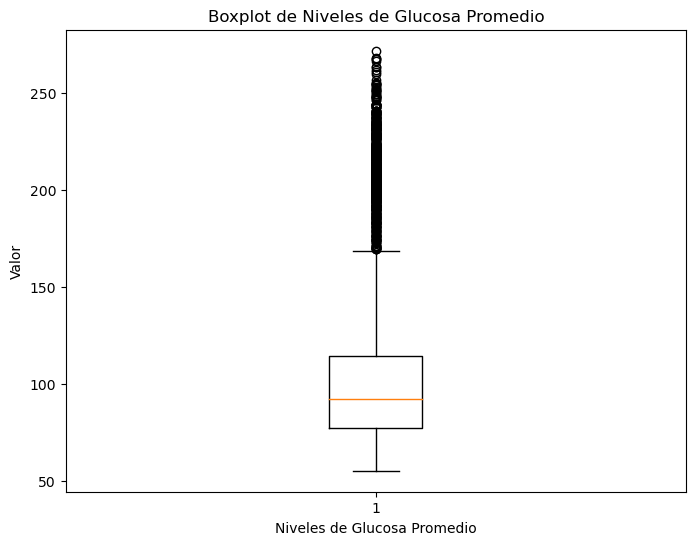

In [10]:
import matplotlib.pyplot as plt
col = df_Hos["Avg_glucose_level"] #Columna que vamos a analizar

plt.figure(figsize=(8,6)) #Se crea el boxplot
plt.boxplot(col)

plt.title("Boxplot de Niveles de Glucosa Promedio") #Agregamos las etiquetas y el título al gráfico
plt.xlabel("Niveles de Glucosa Promedio")
plt.ylabel("Valor")

plt.show() #Imprimimos el gráfico


In [11]:
import numpy as np #Importamos libreria
col = df_Hos["Avg_glucose_level"] #Columna que vamos a analizar

q1 = np.percentile(col, 25) #Calculamos el rango intercuartílico
q2 = np.percentile(col, 75)
qr = q2-q1

limite_inf = q1 -1.5 * qr #Definimos los criterios para identificar atipicos 
limite_sup = q2 +1.5 * qr

atipicos = [num for num in col if num - med <limite_inf or num >limite_sup] #Crea una lista que tiene los valores atipicos de la columna col

print ("Valores atípicos en la columna 'Avg_glucose_level': ",atipicos ) #Imprimimos resultados

Valores atípicos en la columna 'Avg_glucose_level':  [228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.09, 94.39, 76.15, 58.57, 80.43, 120.46, 104.51, 219.84, 214.09, 191.61, 221.29, 89.22, 217.08, 193.94, 233.29, 228.7, 208.3, 102.87, 104.12, 100.98, 189.84, 195.23, 211.78, 212.08, 83.41, 196.92, 252.72, 84.2, 84.03, 219.72, 74.63, 92.62, 60.91, 78.03, 71.22, 90.9, 213.03, 243.58, 109.78, 107.26, 99.33, 58.09, 89.96, 75.32, 127.29, 124.13, 197.54, 196.71, 59.32, 237.75, 194.99, 180.93, 185.17, 74.9, 61.94, 93.72, 104.72, 113.01, 221.58, 104.47, 86.23, 72.67, 62.57, 179.12, 116.55, 228.56, 96.59, 66.72, 240.09, 110.85, 96.16, 101.45, 88.92, 79.79, 71.2, 96.97, 111.81, 59.35, 86.94, 98.55, 226.98, 72.81, 68.02, 68.56, 64.14, 235.63, 76.34, 240.59, 78.92, 82.81, 74.1, 190.32, 231.61, 78.7, 110.52, 82.3, 73.18, 191.82, 93.05, 64.17, 68.53, 106.41, 224.1, 82.1, 216.94, 76.11, 72.96, 82.28, 105.22, 59.86, 62.55, 259.63, 249.31, 219.91, 93.13, 73.54, 200.59, 62.48, 190.14, 182.99, 101.45, 

### Valores atípicos BMI

In [12]:
print(df_Hos["Bmi"]) #Imprime la columna "Bmi" del DataFrame

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5107    30.6
5108    25.6
5109    26.2
5110    31.0
5111    21.0
Name: Bmi, Length: 5112, dtype: float64


In [13]:
import numpy as np
col = df_Hos["Bmi"] #Columna que vamos a analizar
med = np.mean(col) #Calcular la media 
des_es = np.std(col) #Calcular la desviación estandar 

criterio = 2 #Si el valor está más arriba de 2 de la desviación estándar, se va a considerar un valor atípico 

atipicos = [num for num in col if abs(num - med) > criterio * des_es] #Identificamos los valores atipicos
print ("Valores atípicos en la columna 'Bmi': ",atipicos )#Imprimimos

Valores atípicos en la columna 'Bmi':  [40000.0, 40000.0, 40000.0, 40000.0]


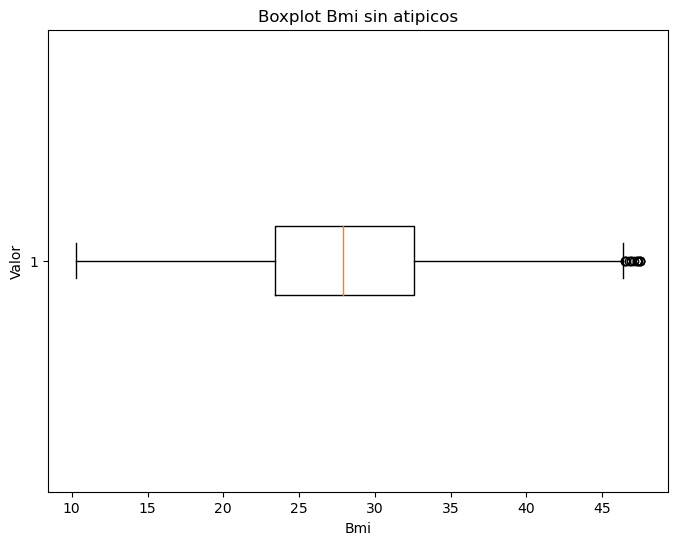

In [14]:

col = df_Hos["Bmi"] #Columna que vamos a analizar

q1 = col.quantile(0.25) #Calculamos el rango intercuartílico
q2 = col.quantile(0.75)
qr = q2-q1

limite_inf = q1 -1.5 * qr #Definimos los criterios para identificar atipicos 
limite_sup = q2 +1.5 * qr

col_sin_atipicos = col[(col >= limite_inf)& (col <= limite_sup )] #Seleccionamos los valores solo dentro dle rango intercuartílico

plt.figure(figsize=(8,6)) #Se crea el boxplot
plt.boxplot(col_sin_atipicos, vert = False)

plt.title("Boxplot Bmi sin atipicos") #Agregamos las etiquetas y el título al gráfico
plt.xlabel("Bmi")
plt.ylabel("Valor")

plt.show() #Imprimimos el gráfico


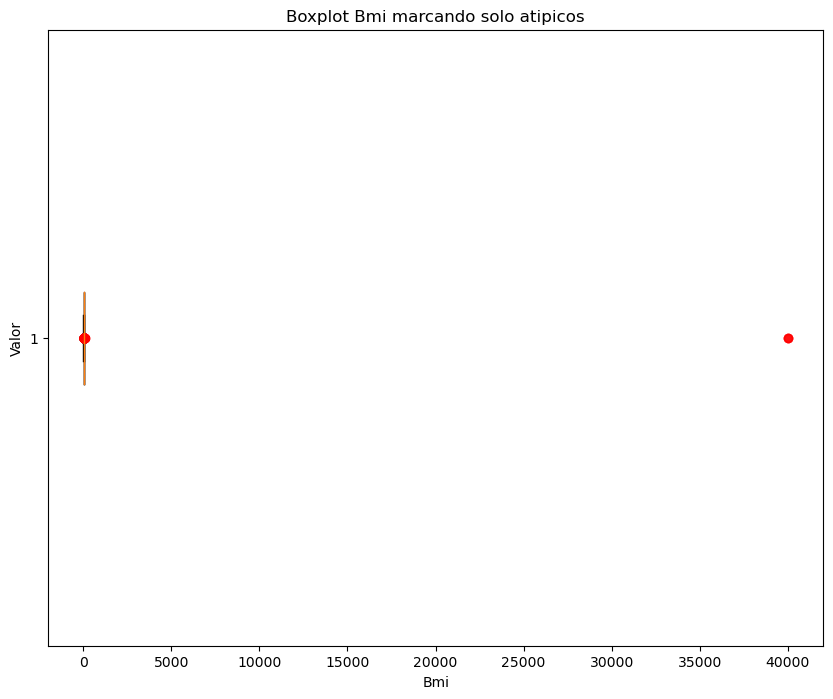

In [15]:

col = df_Hos["Bmi"] #Columna que vamos a analizar

q1 = col.quantile(0.25) #Calculamos el rango intercuartílico
q2 = col.quantile(0.75)
qr = q2-q1

limite_inf = q1 -1.5 * qr #Definimos los criterios para identificar atipicos 
limite_sup = q2 +1.5 * qr

col_sin_atipicos = col[(col >= limite_inf)& (col <= limite_sup )] #Seleccionamos los valores solo dentro dle rango intercuartílico

plt.figure(figsize=(10,8)) #Se crea el boxplot
plt.boxplot(col_sin_atipicos, vert = False)

plt.title("Boxplot Bmi marcando solo atipicos") #Agregamos las etiquetas y el título al gráfico
plt.xlabel("Bmi")
plt.ylabel("Valor")

val_atipicos = col[(col< limite_inf) | (col > limite_sup)] #Sirve para que mostremos los valores atipicos dentro del grafico
plt.plot(val_atipicos, [1]*len(val_atipicos), "ro", alpha = 0.5)
plt.show() #Imprimimos el gráfico


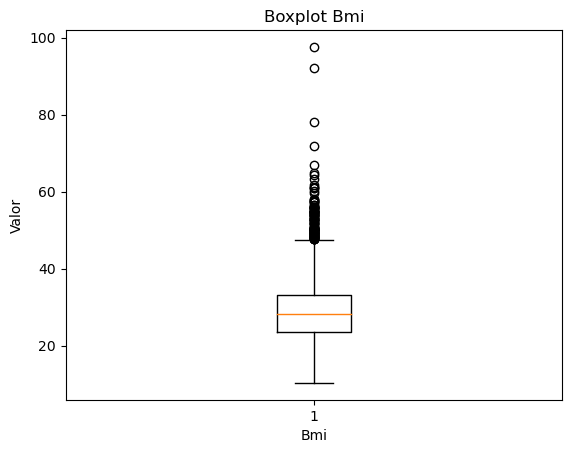

In [16]:

col = df_Hos["Bmi"] # Columna que vamos a analizar 

med = np.mean(col) #Calcular la media 
des_es = np.std(col) #Calcular la desviación estandar 

criterio = 2 #Si el valor está más arriba de 2 de la desviación estándar, se va a considerar un valor atípico 

val_atipicos=[] #Identificamos los valores atipicos
for num in col: 
    if abs(num-med) > criterio*des_es:
        val_atipicos.append(num)
        
col_sin_atipicos = col[np.logical_and(col > med - criterio * des_es, col < med + criterio * des_es)] # Crear el boxplot sin los valores atípicos

plt.boxplot(col_sin_atipicos) # Graficar el boxplot

# Agregar etiquetas al gráfico
plt.title("Boxplot Bmi")
plt.xlabel("Bmi")
plt.ylabel("Valor")

plt.show() #Imprimimos


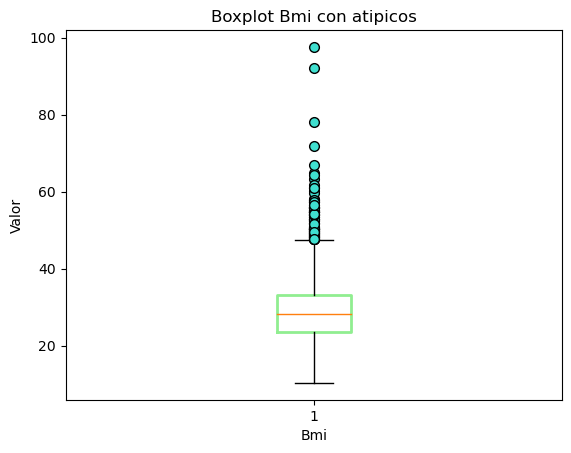

In [17]:
col = df_Hos["Bmi"] # Columna que vamos a analizar 

med = np.mean(col) #Calcular la media 
des_es = np.std(col) #Calcular la desviación estandar 

criterio = 2 #Si el valor está más arriba de 2 de la desviación estándar, se va a considerar un valor atípico 

val_atipicos=[] #Identificamos los valores atipicos
for num in col: 
    if abs(num-med) > criterio*des_es:
        val_atipicos.append(num)
        
# Crear el boxplot con los valores atípicos
col_sin_atipicos = col[np.logical_and(col > med - criterio * des_es, col < med + criterio * des_es)]

fig, ax = plt.subplots()
boxprops = dict(linewidth = 2, color = "lightgreen")
flierprops = dict(marker = "o", markersize = 7, markerfacecolor = "turquoise")
ax.boxplot(col_sin_atipicos, boxprops = boxprops,flierprops = flierprops)

plt.title("Boxplot Bmi con atipicos") # Agregar etiquetas al gráfico
plt.xlabel("Bmi")
plt.ylabel("Valor")

plt.show() #Imprimimos


In [18]:
len(df_Hos["Bmi"]) #Longitud del Bmi



5112

In [19]:
df_Hos["Bmi"]. dtype  #Imprime los tipos de datos


dtype('float64')

In [20]:
df_Hos["Bmi"].isna().sum() #Calcula los Na


201

In [21]:

col = df_Hos["Age"] #Columna que vamos a analizar

q1 = np.percentile(col, 25) #Calculamos el rango intercuartílico
q2 = np.percentile(col, 75)
qr = q2-q1

limite_inf = q1 -1.5 * qr #Definimos los criterios para identificar atipicos 
limite_sup = q2 +1.5 * qr

atipicos = [num for num in col if num < limite_inf or num > limite_sup ] #Identificamos los valores atipicos
print ("Valores atípicos Age: ",atipicos )#Imprimimos


Valores atípicos Age:  []


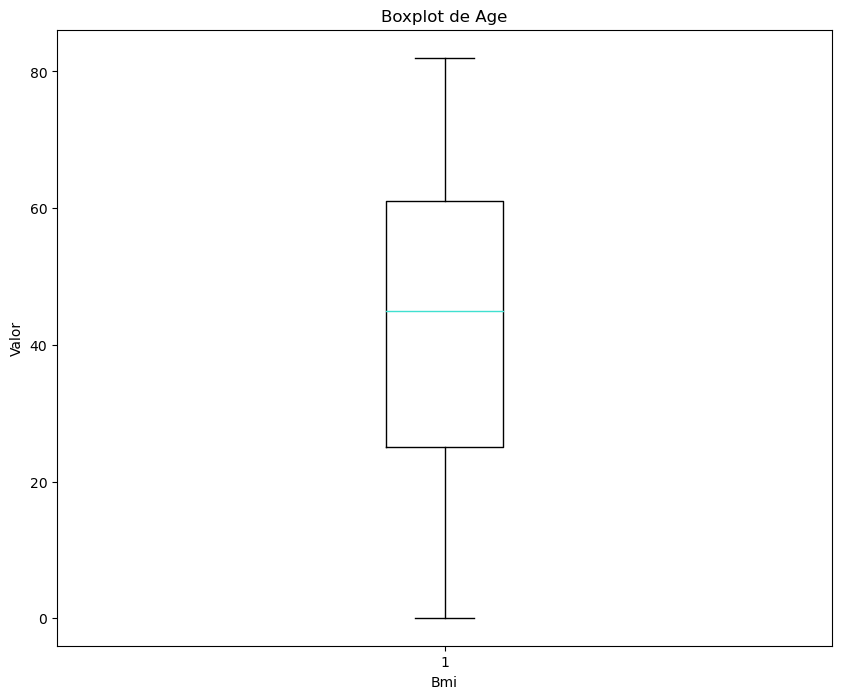

In [22]:

col = df_Hos["Age"] #Columna que se va a analizar

plt.figure(figsize=(10,8)) #Se crea el boxplot
box = plt.boxplot(col)

for median in box["medians"]:
    median.set(color = "turquoise") #Color de la linea del medio, para resaltar esa información
    
plt.title("Boxplot de Age") # Agregar etiquetas al gráfico
plt.xlabel("Bmi")
plt.ylabel("Valor")

plt.show() #Imprimimos


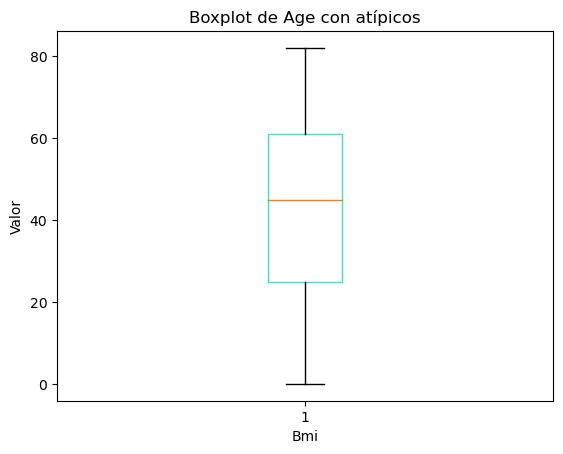

In [23]:
col = df_Hos["Age"] #Columna que se va a analizar

q1 = np.percentile(col, 25) #Calculamos el rango intercuartílico
q2 = np.percentile(col, 75)
qr = q2-q1

limite_inf = q1 -1.5 * qr #Definimos los criterios para identificar atipicos 
limite_sup = q2 +1.5 * qr

atipicos = col[(col >= limite_inf)& (col <= limite_sup )] #Seleccionamos los valores solo dentro dle rango intercuartílico
#Creamos el boxplot con la caja en color turquesa y los valores atípicos en verde claro
plt.boxplot(atipicos, boxprops = dict(color = "turquoise"),flierprops = dict(marker = "o", markersize = 10, markerfacecolor = "lightgreen") )

plt.title("Boxplot de Age con atípicos") # Agregar etiquetas al gráfico
plt.xlabel("Bmi")
plt.ylabel("Valor")

plt.show() #Imprimimos


## Valores nulos 

In [24]:
print(df_Hos["Bmi"].isnull().sum()) #Contamos valores nulos de la columna1



201


In [25]:
fil_nulas = df_Hos[df_Hos.isnull().any(axis=1)] #Muestra las filas que tienen valores nulos
fil_nulas #Imprime las filas con valores nulos


,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1
8,0,0,Yes,ksdh-k,Rural,76.15,NaN,Unknown,Female,59.0,121499.0,3,1
13,0,1,Yes,Private,Urban,219.84,NaN,Unknown,Male,78.0,82192.0,1,1
19,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,Male,57.0,233393.0,0,1
20,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,Female,71.0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0,0,No,Private,Urban,90.57,24.2,Unknown,Female,19.0,NaN,0,0
5093,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,Female,45.0,88999.0,3,0
5099,0,0,Yes,Private,Rural,83.94,NaN,smokes,Male,40.0,106052.0,2,0
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,264441.0,3,0


### Porcentaje de valores para la variable predictiva

#### Hipertención

In [26]:
porcentaje_con_H = (df_Hos["Hypertension"].mean())*100 #Calculamos el % de pacientes con y sin Hipertención
porcentaje_sin_H = 100 - porcentaje_con_H


print(f"Porcentaje de pacientes con hipertensión: {porcentaje_con_H:.2f}%") # Imprimir los resultados
print(f"Porcentaje de pacientes sin hipertensión: {porcentaje_sin_H:.2f}%")


Porcentaje de pacientes con hipertensión: 9.76%
Porcentaje de pacientes sin hipertensión: 90.24%


#### Heart Disease

In [27]:
Porcentaje_con_HeartD = (df_Hos["Heart Disease"].value_counts(normalize=True))*100 #Calculamos el % de pacientes con Heart Disease


print(f"Porcentaje de pacientes con Heart Disease : {Porcentaje_con_HeartD[1]:.2f}%") # Imprimir los resultados
print(f"Porcentaje de pacientes sin Heart Disease: {Porcentaje_con_HeartD[0]:.2f}%")


Porcentaje de pacientes con Heart Disease : 5.40%
Porcentaje de pacientes sin Heart Disease: 94.58%


#### Married

In [28]:
Porcentaje_Married = (df_Hos["Married"].value_counts(normalize=True))*100 #Calculamos el % de pacientes casados

print(f"Porcentaje de pacientes con Married: {Porcentaje_Married['Yes']:.2f}%") # Imprimir los resultados
print(f"Porcentaje de pacientes sin Married: {Porcentaje_Married['No']:.2f}%")


Porcentaje de pacientes con Married: 65.63%
Porcentaje de pacientes sin Married: 34.37%


#### Work

In [29]:
# Lista de categorías de ocupaciones
Categorias_ocupaciones = ["Private", "Self-employed", "k\x96sdh-k", "Govt_job", "sdsd-i", "children", "Never_worked", "dsfsdf", "sdfsdf"]

for categoria in Categorias_ocupaciones: # Calculamos y mostramos el porcentaje para cada categoría de ocupación
    porcentaje = (df_Hos["Work"] == categoria).mean() * 100
    print(f"Porcentaje de pacientes con ocupación {categoria}: {porcentaje:.2f}%")

Porcentaje de pacientes con ocupación Private: 57.08%
Porcentaje de pacientes con ocupación Self-employed: 15.98%
Porcentaje de pacientes con ocupación ksdh-k: 0.08%
Porcentaje de pacientes con ocupación Govt_job: 12.85%
Porcentaje de pacientes con ocupación sdsd-i: 0.02%
Porcentaje de pacientes con ocupación children: 13.46%
Porcentaje de pacientes con ocupación Never_worked: 0.43%
Porcentaje de pacientes con ocupación dsfsdf: 0.04%
Porcentaje de pacientes con ocupación sdfsdf: 0.06%


#### Residence

In [30]:
Categorias_residencia = ["Urban", "Rural"] #Lista de categorias de residencia

for categoria in Categorias_residencia: # Calculamos y mostramos el porcentaje para cada categoría de residencia
    porcentaje = (df_Hos["Residence"] == categoria).mean() * 100
    print(f"Porcentaje de pacientes que viven en {categoria}: {porcentaje:.2f}%")

Porcentaje de pacientes que viven en Urban: 50.82%
Porcentaje de pacientes que viven en Rural: 49.18%


#### BMI

In [31]:

lim_imc = {  # Definimos los límites y los nombres de los grupos de IMC
    "Bajo Peso": (0.0, 18.5),
    "Peso normal": (18.5, 25.0),
    "Sobrepeso": (25.0, 30.0),
    "Obesidad Grado 1": (30.0, 35.0),
    "Obesidad Grado 2": (35.0, 40.0),
    "Obesidad Grado 3": (40.0, float('inf'))
}


def clasificar_imc(imc):  # Clasificamos el IMC en grupos
    for grupo, (lim_inf, lim_sup) in lim_imc.items():
        if lim_inf <= imc < lim_sup:
            return grupo
    return "No valido"


df_Hos["Grupo de Imc"] = df_Hos["Bmi"].apply(clasificar_imc) # Se Crea una nueva columna "Grupo de IMC" utilizando la función de clasificación


for grupo in lim_imc.keys():  # Calculamos y mostramos el porcentaje de pacientes en cada grupo de IMC
    porcentaje = (df_Hos["Grupo de Imc"] == grupo).mean() * 100
    print(f"Porcentaje de pacientes en {grupo}: {porcentaje:.2f}%")


porcentaje_no_valido = (df_Hos["Grupo de Imc"] == "No valido").mean() * 100  # Calculamos el porcentaje de pacientes con IMC no válido
print(f"Porcentaje de pacientes con IMC no válido: {porcentaje_no_valido:.2f}%")

Porcentaje de pacientes en Bajo Peso: 6.57%
Porcentaje de pacientes en Peso normal: 24.32%
Porcentaje de pacientes en Sobrepeso: 27.56%
Porcentaje de pacientes en Obesidad Grado 1: 19.58%
Porcentaje de pacientes en Obesidad Grado 2: 9.86%
Porcentaje de pacientes en Obesidad Grado 3: 8.18%
Porcentaje de pacientes con IMC no válido: 3.93%


#### Smoking

In [32]:
porcentaje_formelyS = (df_Hos["Smoking"] == "formerly smoked").mean() * 100 #Calculamos el porcentaje de pacientes en cada categoría de fumadores
porcentaje_neverS = (df_Hos["Smoking"] == "never smoked").mean() * 100 
porcentaje_smokes = (df_Hos["Smoking"] == "smokes").mean() * 100
porcentaje_nunca = (df_Hos["Smoking"] == "Unknown").mean() * 100


print(f"% porcentaje_formelyS: {porcentaje_formelyS:.2f}%") # Imprimimos los resultados
print(f"% porcentaje_neverS: {porcentaje_neverS:.2f}%")
print(f"% porcentaje_smokes: {porcentaje_smokes:.2f}%")
print(f"% porcentaje_nunca: {porcentaje_nunca:.2f}%")

% porcentaje_formelyS: 17.33%
% porcentaje_neverS: 37.03%
% porcentaje_smokes: 15.41%
% porcentaje_nunca: 30.20%


#### Gender

In [33]:
porcentaje_hombres = (df_Hos["Gender"] == "Male").mean() * 100 #Calculamos el porcentaje de pacientes en cada categoria de genero
porcentaje_mujeres = (df_Hos["Gender"] == "Female").mean() * 100
porcentaje_Otro = (df_Hos["Gender"] == "Other").mean() * 100

print(f"% porcentaje_hombres: {porcentaje_hombres:.2f}%") # Imprimimos los resultados
print(f"% porcentaje_mujeres: {porcentaje_mujeres:.2f}%")
print(f"% porcentaje_Otro: {porcentaje_Otro:.2f}%")


% porcentaje_hombres: 39.89%
% porcentaje_mujeres: 58.61%
% porcentaje_Otro: 1.51%


In [34]:
Otro = df_Hos["Gender"].value_counts().get("Other", 0) #Numero de pacientes con el genero otro
Otro #Imprimimos el resultado


77

### Age

In [35]:
porcentaje_niños = (df_Hos["Age"] <= 11).mean() * 100 # Calculamos el porcentaje de pacientes en cada grupo de edad
porcentaje_adolescentes = ((df_Hos["Age"] >= 12) & (df_Hos["Age"] <= 18)).mean() * 100
porcentaje_adultos = ((df_Hos["Age"] >= 19) & (df_Hos["Age"] <= 59)).mean() * 100
porcentaje_adultos_mayores = ((df_Hos["Age"] >= 60) & (df_Hos["Age"] <= 100)).mean() * 100


print(f"Porcentaje de pacientes niños: {porcentaje_niños:.2f}%") # Imprimimos los resultados
print(f"Porcentaje de pacientes adolescentes: {porcentaje_adolescentes:.2f}%")
print(f"Porcentaje de pacientes adultos: {porcentaje_adultos:.2f}%")
print(f"Porcentaje de pacientes adultos mayores: {porcentaje_adultos_mayores:.2f}%")

Porcentaje de pacientes niños: 10.62%
Porcentaje de pacientes adolescentes: 7.30%
Porcentaje de pacientes adultos: 55.16%
Porcentaje de pacientes adultos mayores: 26.92%


### Children

In [36]:
df_hijos_hasta_3 = df_Hos[df_Hos["Children"] <= 3] # Filtramos el DataFrame para incluir solo personas con hasta 3 hijos

porcentaje_hijos = (df_hijos_hasta_3["Children"].value_counts(normalize=True) * 100).sort_index() # Calculamos el porcentaje de personas con diferentes números de hijos

for hijos, porcentaje in porcentaje_hijos.items(): #porcentaje de personas con cada cantidad de hijos
    print(f"Porcentaje de personas con {hijos} hijos: {porcentaje:.2f}%") #Imprimimos resultados

Porcentaje de personas con 0 hijos: 38.10%
Porcentaje de personas con 1 hijos: 19.60%
Porcentaje de personas con 2 hijos: 20.83%
Porcentaje de personas con 3 hijos: 21.46%


### Stroke

In [37]:
Porcentaje_con_Stroke = (df_Hos["Stroke"] == 1).mean()*100 #% de pacientes con Stroke

Porcentaje_sin_Stroke = (df_Hos["Stroke"] == 0).mean()*100 #% de pacientes sin Stroke

print(f"Porcentaje de pacientes con Stroke: {Porcentaje_con_Stroke:.2f}%") #Imprimimos resultados
print(f"Porcentaje de pacientes sin Stroke: {Porcentaje_sin_Stroke:.2f}%")

Porcentaje de pacientes con Stroke: 4.87%
Porcentaje de pacientes sin Stroke: 95.13%


### Cambio de nombre (columna Heart Disease)


In [38]:
df_Hos.columns #Nombres de las columnas del DF

Index(['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children', 'Stroke', 'Grupo de Imc'],
      dtype='object')

In [39]:
df_Hos.rename(columns = {"Heart Disease":"Heart_Disease"}, inplace = True)  #Se cambia de nombre en el DF a Heart_Disease
df_Hos.columns #Imprimimos


Index(['Hypertension', 'Heart_Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children', 'Stroke', 'Grupo de Imc'],
      dtype='object')

#### Cambio de Datos

In [40]:
#Leemos nuevamente el csv
df_nuevo = pd.read_csv("PublicHospitalDataset - Copy.csv", encoding = "ISO-8859-1")
df_nuevo.rename(columns = {"Heart Disease":"Heart_Disease"}, inplace = True) #Confirmamos que se haya cambiado el nombre

In [41]:
df_nuevo = df_Hos.copy() #Convertimos las columnas a tipos de datos especificos en el df_nuevo
columnas_convertir = ["Hypertension", "Heart_Disease", "Married", "Work", "Residence", "Smoking", "Gender", "Stroke", "Children", "Grupo de Imc"]
tipos_datos = ["category", "category", "category", "category", "category", "category", "category", "category", "category", "category", "category"]

for col, dtype in zip(columnas_convertir, tipos_datos ):
    df_nuevo[col] = df_Hos[col].astype(dtype)  



In [42]:
df_nuevo.columns #Columnas del DF

Index(['Hypertension', 'Heart_Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children', 'Stroke', 'Grupo de Imc'],
      dtype='object')

In [43]:
df_nuevo.dtypes  #Imprimira los tipos de datos de las columnas del DF

Hypertension         category
Heart_Disease        category
Married              category
Work                 category
Residence            category
Avg_glucose_level     float64
Bmi                   float64
Smoking              category
Gender               category
Age                   float64
Income                float64
Children             category
Stroke               category
Grupo de Imc         category
dtype: object

# Verificamos las categorias 

In [44]:
print(df_nuevo["Hypertension"].cat.categories) #Verificamos todas las categorias 
print("\n")
print(df_nuevo["Heart_Disease"].cat.categories)
print("\n")
print(df_nuevo["Married"].cat.categories)
print("\n")
print(df_nuevo["Work"].cat.categories)
print("\n")
print(df_nuevo["Smoking"].cat.categories)
print("\n")
print(df_nuevo["Gender"].cat.categories)
print("\n")
print(df_nuevo["Children"].cat.categories)
print("\n")

Int64Index([0, 1], dtype='int64')


Index(['0', '1', 'No'], dtype='object')


Index(['No', 'Yes'], dtype='object')


Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children',
       'dsfsdf', 'ksdh-k', 'sdfsdf', 'sdsd-i'],
      dtype='object')


Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes', 'weed'], dtype='object')


Index(['Female', 'Male', 'Other'], dtype='object')


Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')




### Eliminamos los datos del work que no son factibles

In [45]:
df1 = df_Hos[df_Hos["Work"].isin(["dsfsdf", "ksdh-k", "sdfsdf", "sdsd-i"])] # Estas filas tienen valores en la columna "Work" que están en la lista proporcionada.
df1

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
8,0,0,Yes,ksdh-k,Rural,76.15,NaN,Unknown,Female,59.0,121499.0,3,1,No valido
64,0,0,Yes,ksdh-k,Urban,104.72,NaN,Unknown,Male,75.0,105544.0,3,1,No valido
90,0,1,Yes,sdsd-i,Urban,226.98,29.8,never smoked,Female,79.0,180881.0,3,1,Sobrepeso
300,0,0,Yes,ksdh-k,Urban,81.51,28.5,Unknown,Female,53.0,11650.0,2,0,Sobrepeso
806,0,0,Yes,ksdh-k,Rural,114.32,26.4,never smoked,Male,39.0,92013.0,1,0,Sobrepeso
2787,0,0,Yes,dsfsdf,Rural,84.60,27.0,smokes,Female,42.0,442516.0,2,0,Sobrepeso
4832,0,0,No,sdfsdf,Urban,61.88,20.1,never smoked,Female,20.0,551530.0,2,0,Peso normal
5055,0,0,No,sdfsdf,Urban,92.06,25.3,smokes,Female,25.0,196052.0,2,0,Sobrepeso
5065,0,0,Yes,sdfsdf,Urban,89.01,37.4,never smoked,Female,31.0,596184.0,3,0,Obesidad Grado 2
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,NaN,2,0,Obesidad Grado 3


In [46]:
df_nuevo = df_nuevo[df_nuevo["Work"].isin(["Private", "Self-employed", "Govt_job", "children", "Never_worked"])] # Filtramos el DataFrame df_nuevo para incluir las filas donde esta el valor work
df_nuevo

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44.0,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33.0,18883.0,3,0,Obesidad Grado 1


In [47]:
df_nuevo["Work"].unique() #Valore unicos de la columna work 


['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (9, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', ..., 'dsfsdf', 'ksdh-k', 'sdfsdf', 'sdsd-i']

In [48]:
print(df_nuevo["Work"].value_counts()) #imprime el recuento de cada valor único en la columna "Work"

Private          2918
Self-employed     817
children          688
Govt_job          657
Never_worked       22
dsfsdf              0
ksdh-k             0
sdfsdf              0
sdsd-i              0
Name: Work, dtype: int64


In [49]:
df_nuevo["Work"].dtype #Nuevos tipos de datos

CategoricalDtype(categories=['Govt_job', 'Never_worked', 'Private', 'Self-employed',
                  'children', 'dsfsdf', 'ksdh-k', 'sdfsdf', 'sdsd-i'],
, ordered=False)

In [50]:
df_nuevo["Work"].unique() #Nuevos valores unicos de work

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (9, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', ..., 'dsfsdf', 'ksdh-k', 'sdfsdf', 'sdsd-i']

In [51]:
print(df_nuevo["Hypertension"].cat.categories, "\n") #Categorias unicas de cada columna del DF
print(df_nuevo["Heart_Disease"].cat.categories, "\n")
print(df_nuevo["Married"].cat.categories, "\n")
#print(df_nuevo["Work"].cat.categories, "\n")
print(df_nuevo["Smoking"].cat.categories, "\n")
print(df_nuevo["Gender"].cat.categories, "\n")
print(df_nuevo["Children"].cat.categories, "\n")

Int64Index([0, 1], dtype='int64') 

Index(['0', '1', 'No'], dtype='object') 

Index(['No', 'Yes'], dtype='object') 

Index(['Unknown', 'formerly smoked', 'never smoked', 'smokes', 'weed'], dtype='object') 

Index(['Female', 'Male', 'Other'], dtype='object') 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64') 



#### Volver a verificar filas nulas

In [52]:
filas_nulas0 = df_nuevo[df_nuevo.isnull().any(axis = 1)] #Vemos las filas nulas del DF
filas_nulas0

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1,No valido
13,0,1,Yes,Private,Urban,219.84,NaN,Unknown,Male,78.0,82192.0,1,1,No valido
19,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,Male,57.0,233393.0,0,1,No valido
20,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,Female,71.0,NaN,2,1,Peso normal
27,0,0,Yes,Private,Rural,189.84,NaN,Unknown,Male,58.0,165383.0,2,1,No valido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,0,0,Yes,Private,Urban,191.15,NaN,smokes,Male,40.0,298000.0,0,0,No valido
5083,0,0,No,Private,Urban,90.57,24.2,Unknown,Female,19.0,NaN,0,0,Peso normal
5093,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,Female,45.0,88999.0,3,0,No valido
5099,0,0,Yes,Private,Rural,83.94,NaN,smokes,Male,40.0,106052.0,2,0,No valido


In [53]:
df_nuevo["Avg_glucose_level"].unique() #Valores unicos de la columna

array([228.69, 202.21, 105.92, ..., 166.29,  85.28,  90.53])

In [54]:
df_nuevo["Bmi"].unique() #Valores unicos de la columna


array([3.66e+01,      nan, 3.25e+01, 3.44e+01, 2.40e+01, 2.90e+01,
       2.74e+01, 2.28e+01, 2.42e+01, 2.97e+01, 3.68e+01, 2.73e+01,
       2.82e+01, 3.09e+01, 3.75e+01, 2.58e+01, 3.78e+01, 2.24e+01,
       4.89e+01, 2.66e+01, 2.72e+01, 2.35e+01, 2.83e+01, 4.42e+01,
       2.54e+01, 2.22e+01, 3.05e+01, 2.65e+01, 3.37e+01, 2.31e+01,
       3.20e+01, 2.99e+01, 2.39e+01, 2.85e+01, 2.64e+01, 2.02e+01,
       3.36e+01, 3.86e+01, 3.92e+01, 2.77e+01, 3.14e+01, 3.65e+01,
       3.32e+01, 3.28e+01, 4.04e+01, 2.53e+01, 3.02e+01, 4.75e+01,
       2.03e+01, 3.00e+01, 2.89e+01, 2.81e+01, 3.11e+01, 2.17e+01,
       2.70e+01, 2.41e+01, 4.59e+01, 4.41e+01, 2.29e+01, 2.91e+01,
       3.23e+01, 4.11e+01, 2.56e+01, 2.63e+01, 2.62e+01, 2.94e+01,
       2.44e+01, 2.80e+01, 2.88e+01, 3.46e+01, 1.94e+01, 3.03e+01,
       4.15e+01, 2.26e+01, 5.66e+01, 2.71e+01, 3.13e+01, 3.10e+01,
       3.17e+01, 3.58e+01, 2.84e+01, 2.01e+01, 2.67e+01, 3.87e+01,
       3.49e+01, 2.50e+01, 2.38e+01, 2.18e+01, 2.75e+01, 2.46e

#### Se verifica los valores max y min aceptables del nivel de glucosa 

In [55]:
col = df_Hos["Avg_glucose_level"] #Columna que vamos a analizar

q1 = np.percentile(col, 25) #Calculamos el rango intercuartílico
q2 = np.percentile(col, 75)
qr = q2-q1

limite_inf = q1 -1.5 * qr #Definimos los criterios para identificar atipicos 
limite_sup = q2 +1.5 * qr

val_atipicos = col[(col< limite_inf) | (col > limite_sup)] #Sirve para que mostremos los valores atipicos dentro del grafico

atipicos_ordenados = val_atipicos.sort_values().values #identificamos los atipicos
print(atipicos_ordenados) #Se imprime el resultado

[169.43 169.49 169.67 169.74 169.97 170.05 170.22 170.76 170.88 170.93
 170.95 171.23 172.27 172.33 172.86 173.14 173.43 173.9  173.96 173.97
 174.12 174.37 174.43 174.54 175.29 175.74 175.92 176.25 176.34 176.38
 176.42 176.48 176.71 176.78 177.56 177.91 178.29 178.33 178.76 178.89
 179.12 179.14 179.38 179.67 180.45 180.63 180.76 180.8  180.93 181.23
 181.23 181.3  182.2  182.22 182.52 182.86 182.9  182.99 183.   183.1
 183.34 183.43 183.45 183.87 184.15 184.25 184.4  185.   185.17 185.27
 185.28 185.31 185.49 185.71 186.17 186.21 186.32 186.4  186.45 186.54
 186.95 187.22 187.47 187.52 187.87 187.88 187.99 188.11 188.13 188.69
 189.44 189.45 189.49 189.57 189.82 189.84 189.88 190.13 190.14 190.32
 190.4  190.67 190.7  190.89 190.92 191.15 191.33 191.47 191.48 191.61
 191.66 191.78 191.79 191.82 191.94 192.16 192.37 192.39 192.47 192.5
 193.22 193.45 193.61 193.8  193.81 193.83 193.87 193.88 193.94 194.04
 194.37 194.53 194.53 194.62 194.75 194.98 194.99 195.03 195.04 195.16
 195.23 

In [56]:
valores_mayores_200 = (df_nuevo["Avg_glucose_level"] > 200).sum() #Vemos los valores mayores a 200 de glucosa 
print(valores_mayores_200)

433


In [57]:
df_Hos.isnull().sum()

Hypertension           0
Heart_Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Income                27
Children               0
Stroke                 0
Grupo de Imc           0
dtype: int64

In [58]:
valores_70_y_120 = ((df_nuevo["Avg_glucose_level"] >= 70) & (df_nuevo["Avg_glucose_level"] <= 120)).sum() #Vemos los valores entre 70 y 120 de glucosa 
print(valores_70_y_120)

3232


#### Se deja los valores atípicos ya que si se puede tener glucosas mayores a 199-200, es valido para un diabetico.

In [59]:
df_nuevo["Bmi"]  #Columna Bmi

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5107    30.6
5108    25.6
5109    26.2
5110    31.0
5111    21.0
Name: Bmi, Length: 5102, dtype: float64

#### Se verifica el número de datos atípicos. 

In [60]:
Bmi_atipicos = (df_nuevo["Bmi"] == 40000).sum() #Vemos cuantos valores de 40.000 hay
print(Bmi_atipicos)

4


In [61]:
numeros_nulos = df_nuevo["Bmi"].isnull().sum() #Mostramos el numero de valores nulos en Bmi

print("El numero de valores nulos en Bmi:",numeros_nulos)

El numero de valores nulos en Bmi: 199


#### Verificamos los atipicos de BMI

In [62]:
df_nuevo = df_nuevo[df_nuevo["Bmi"]!=40000] #Eliminamos los valores igualesa 40.000

In [63]:
print(df_nuevo["Bmi"][df_nuevo["Bmi"]== 40000]. count()) #Comprobamos si los elimino

0


In [64]:
df_nuevo["Bmi"].unique #Vemos nuevamente los valores unicos de la columna

<bound method Series.unique of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5107    30.6
5108    25.6
5109    26.2
5110    31.0
5111    21.0
Name: Bmi, Length: 5098, dtype: float64>

#### Eliminamos el Other de la columna Gender

In [65]:
df_nuevo = df_nuevo[df_nuevo["Gender"]!= "Other"] #Eliminamos los valores de otros en la columna genero

In [66]:
Others = (df_nuevo["Gender"] == "Other").mean()*100 #Vemos el porcentaje de pacientes para poder confirmar que se elimino
print(f"Porcentaje de pacientes Other: {Others:.2f}%")

Porcentaje de pacientes Other: 0.00%


In [67]:
print(df_nuevo.Gender.cat.categories) #Imprimimos sus categorias


Index(['Female', 'Male', 'Other'], dtype='object')


#### Despues de eliminar los datos, se verifica los atípicos nuevos 

In [68]:

col = df_nuevo["Bmi"] #Columna que vamos a analizar
med = np.mean(col) #Calcular la media 
des_es = np.std(col) #Calcular la desviación estandar 

criterio = 2 #Si el valor está más arriba de 2 de la desviación estándar, se va a considerar un valor atípico 

atipicos = [] #Identificamos los valores atípicos
for num in col: 
    if abs(num - med) > criterio * des_es:
        atipicos.append(num)
        

atipicos_ordenados = sorted(atipicos) # Ordenar los valores de la lista


num_valores_por_fila = 10    # Imprimir los valores atípicos en filas de 10 datos por fila
for i in range(0, len(atipicos_ordenados), num_valores_por_fila):
    fila = atipicos_ordenados[i:i+num_valores_por_fila]
    print(" ".join(map(str, fila)))

10.3 11.3 11.5 12.0 12.3 12.8 13.0 44.6 44.6 44.7
44.7 44.7 44.7 44.7 44.8 44.8 44.8 44.8 44.9 44.9
45.0 45.0 45.0 45.0 45.0 45.1 45.1 45.2 45.2 45.2
45.3 45.3 45.3 45.3 45.4 45.4 45.4 45.4 45.5 45.5
45.5 45.5 45.7 45.7 45.8 45.9 45.9 46.0 46.0 46.0
46.0 46.1 46.1 46.2 46.2 46.3 46.4 46.5 46.5 46.6
46.8 46.9 46.9 47.1 47.3 47.3 47.4 47.5 47.5 47.5
47.6 47.6 47.6 47.8 47.8 47.9 48.0 48.1 48.2 48.3
48.3 48.4 48.5 48.5 48.7 48.8 48.8 48.9 48.9 48.9
49.2 49.3 49.3 49.3 49.4 49.5 49.5 49.8 49.8 49.8
49.9 50.1 50.1 50.2 50.2 50.2 50.2 50.3 50.4 50.5
50.6 50.6 50.8 50.9 51.0 51.5 51.7 51.8 51.9 51.9
52.3 52.7 52.7 52.8 52.8 52.8 52.9 53.4 53.4 53.5
53.8 53.8 53.9 54.0 54.1 54.2 54.3 54.6 54.6 54.7
54.7 54.7 54.8 55.0 55.0 55.1 55.2 55.7 55.7 55.7
55.7 55.9 55.9 56.0 56.1 56.6 56.6 57.2 57.2 57.3
57.5 57.7 57.9 58.1 60.2 60.9 60.9 61.2 61.6 63.3
64.4 64.8 66.8 71.9 78.0 92.0 97.6


In [69]:
df_nuevo[df_nuevo["Bmi"] == 12.3] #Ejemplo de un dato del DF 

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
922,0,0,No,children,Urban,106.51,12.3,Unknown,Female,8.0,110571.0,0,0,Bajo Peso


In [70]:
df_nuevo[df_nuevo["Bmi"] == 78.0]#Ejemplo de un dato del DF

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
928,1,0,No,Private,Urban,70.03,78.0,smokes,Female,23.0,16322.0,1,0,Obesidad Grado 3


#### Datos atípicos de la columna Age 

In [71]:
df_decimales = df_nuevo[df_nuevo["Age"].astype(str).str.contains("\.")]
print(df_decimales["Age"]) #Se imprime los valores decimales encontrados

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5107    35.0
5108    51.0
5109    44.0
5110    33.0
5111    34.0
Name: Age, Length: 5021, dtype: float64


In [72]:
# Filtramos la columna "Age" para valores con decimales diferentes de cero
distintos = df_nuevo[df_nuevo['Age'].apply(lambda age: str(age).find('.') != -1 and str(age).split('.')[1] != '0')]['Age']

# Imprimir los valores que tienen decimales distintos de cero en la columna "Age"
distintos

162     1.32
363     0.64
376     0.88
562     1.80
564     0.32
        ... 
4934    1.32
5032    1.24
5079    1.72
5089    0.72
5095    1.08
Name: Age, Length: 113, dtype: float64

In [73]:
Valores_inconsientes = df_nuevo.loc[df_nuevo["Age"]< 1] #Vemos donde los valores de la columna menores a 1 
Valores_inconsientes

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
363,0,0,No,children,Urban,83.82,24.9,Unknown,Female,0.64,170609.0,0,0,Peso normal
376,0,0,No,children,Rural,88.11,15.5,Unknown,Female,0.88,112577.0,0,0,Bajo Peso
564,0,0,No,children,Rural,73.71,16.2,Unknown,Female,0.32,183094.0,0,0,Bajo Peso
982,0,0,No,children,Rural,157.57,19.2,Unknown,Male,0.88,65113.0,0,0,Peso normal
996,0,0,No,children,Rural,118.87,16.3,Unknown,Male,0.24,26581.0,0,0,Bajo Peso
1093,0,0,No,children,Rural,55.86,16.0,Unknown,Female,0.32,28373.0,0,0,Bajo Peso
1206,0,0,No,children,Urban,66.36,23.0,Unknown,Female,0.72,182834.0,0,0,Peso normal
1317,0,0,No,children,Rural,98.67,17.5,Unknown,Male,0.80,198484.0,0,0,Bajo Peso
1600,0,0,No,children,Urban,109.56,14.3,Unknown,Male,0.40,112469.0,0,0,Bajo Peso
1614,0,0,No,children,Urban,139.67,14.1,Unknown,Female,0.08,138645.0,0,0,Bajo Peso


In [74]:
Valores_inconsientes.count() #Contamos los valores

Hypertension         42
Heart_Disease        42
Married              42
Work                 42
Residence            42
Avg_glucose_level    42
Bmi                  41
Smoking              42
Gender               42
Age                  42
Income               42
Children             42
Stroke               42
Grupo de Imc         42
dtype: int64

In [75]:
años_1y2 = df_nuevo[df_nuevo["Age"].between(1,2)] #Vemos los valores de la columna que esten entre 1 y 2 años
años_1y2

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
162,0,0,No,children,Urban,70.37,NaN,Unknown,Female,1.32,236712.0,0,1,No valido
437,0,0,No,children,Rural,92.48,18.0,Unknown,Female,2.00,163565.0,0,0,Bajo Peso
562,0,0,No,children,Urban,58.26,16.5,Unknown,Female,1.80,NaN,0,0,Bajo Peso
597,0,0,No,children,Rural,60.53,17.5,Unknown,Female,1.08,298521.0,0,0,Bajo Peso
607,0,0,No,children,Urban,102.34,17.0,Unknown,Female,1.80,204322.0,0,0,Bajo Peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,0,0,No,children,Rural,107.02,NaN,Unknown,Male,1.32,16368.0,0,0,No valido
4961,0,0,No,children,Rural,80.30,21.2,Unknown,Female,2.00,7857.0,0,0,Peso normal
5032,0,0,No,children,Rural,61.94,20.3,Unknown,Female,1.24,12010.0,0,0,Peso normal
5079,0,0,No,children,Urban,77.28,17.1,Unknown,Male,1.72,12083.0,0,0,Bajo Peso


In [76]:
df_nuevo["Age"].unique #Imprimos los valores unicos de la columna

<bound method Series.unique of 0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5107    35.0
5108    51.0
5109    44.0
5110    33.0
5111    34.0
Name: Age, Length: 5021, dtype: float64>

#### Se redondea Edades

In [77]:
df_nuevo["Age"] = df_nuevo["Age"].apply(lambda age: round(age)) #Redondeamos los valores de la columna age

In [78]:
df_nuevo[df_nuevo["Age"]==1] #Imprime los valores de la columna iguales a 1

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
162,0,0,No,children,Urban,70.37,NaN,Unknown,Female,1,236712.0,0,1,No valido
363,0,0,No,children,Urban,83.82,24.9,Unknown,Female,1,170609.0,0,0,Peso normal
376,0,0,No,children,Rural,88.11,15.5,Unknown,Female,1,112577.0,0,0,Bajo Peso
597,0,0,No,children,Rural,60.53,17.5,Unknown,Female,1,298521.0,0,0,Bajo Peso
753,0,0,No,children,Urban,60.98,17.2,Unknown,Female,1,220854.0,0,0,Bajo Peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,0,0,No,children,Urban,80.08,16.4,Unknown,Male,1,12382.0,0,0,Bajo Peso
4934,0,0,No,children,Rural,107.02,NaN,Unknown,Male,1,16368.0,0,0,No valido
5032,0,0,No,children,Rural,61.94,20.3,Unknown,Female,1,12010.0,0,0,Peso normal
5089,0,0,No,children,Rural,62.13,16.8,Unknown,Female,1,10490.0,0,0,Bajo Peso


In [79]:
df_nuevo["Age"] = df_nuevo["Age"].round() #Redondeamoslos valores de la columna age
df_nuevo #Imprimimos

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


In [80]:
df_nuevo[df_nuevo["Age"]==2] #Valores iguales a 2

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
437,0,0,No,children,Rural,92.48,18.0,Unknown,Female,2,163565.0,0,0,Bajo Peso
562,0,0,No,children,Urban,58.26,16.5,Unknown,Female,2,NaN,0,0,Bajo Peso
607,0,0,No,children,Urban,102.34,17.0,Unknown,Female,2,204322.0,0,0,Bajo Peso
683,0,0,No,children,Rural,79.89,31.6,Unknown,Female,2,148513.0,0,0,Obesidad Grado 1
684,0,0,No,children,Urban,130.61,14.4,Unknown,Female,2,218838.0,0,0,Bajo Peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,0,0,No,children,Rural,65.84,16.1,Unknown,Male,2,22580.0,0,0,Bajo Peso
4657,0,0,No,children,Rural,96.47,19.5,Unknown,Male,2,9881.0,0,0,Peso normal
4842,0,0,No,children,Urban,153.31,17.1,Unknown,Male,2,20894.0,0,0,Bajo Peso
4961,0,0,No,children,Rural,80.30,21.2,Unknown,Female,2,7857.0,0,0,Peso normal


In [81]:
df_nuevo["Age"].max() #valor maximo de la columna age

82

#### Eliminamos Datos

### Menores a 16 años que trabajen para el estado

In [82]:
df_nuevo.query("Age < 16 and Work == 'Govt_job'") # seleccionamos todas las filas donde la edad es menor que 16 y el valor en la columna "Work" es igual a "Govt_job"

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
284,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,Male,14,281697.0,0,0,Obesidad Grado 1
3300,0,0,No,Govt_job,Rural,142.82,27.6,never smoked,Male,15,93819.0,0,0,Sobrepeso


In [83]:
df_nuevo = df_nuevo.query('~(Age < 16 & Work == "Govt_job")') #selecciona todas las filas que no cumplen con ambas condiciones
df_nuevo

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


#### Persona mayor a 40 años que trabaja, tiene niños y sobrepeso

In [84]:
df_nuevo.query("Bmi > 40 and Work == 'children'") #Selecciona todas las filas donde el valor en la columna "Bmi" sea mayor que 40 y el valor en la columna "Work" sea igual a "children"

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
306,0,0,No,children,Urban,75.42,40.1,Unknown,Female,13,130130.0,0,0,Obesidad Grado 3
693,0,0,No,children,Urban,131.51,41.7,never smoked,Female,13,269675.0,0,0,Obesidad Grado 3


In [85]:
df_nuevo = df_nuevo.drop(df_nuevo.query("Bmi > 40 and Work == 'children'").index) # Eliminamos del DataFrame df_nuevo todas las filas donde el valor de Bmi sea mayor que 40 y el trabajo sea 'children'
df_nuevo

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


#### Niños menores de 5 años que trabajan 

In [86]:
df_nuevo[(df_nuevo["Age"]< 5) & (df_nuevo["Work"]!= "Never_worked")  & (df_nuevo["Stroke"] == 0)] # Selecciono todas las filas del DataFrame df_nuevo donde sea menor a 5 años, nunca trabajo y el stroke igual a 0

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
249,0,0,No,children,Rural,95.12,18.0,Unknown,Male,3,234580.0,0,0,Bajo Peso
282,0,0,No,children,Urban,73.74,16.0,Unknown,Female,3,10058.0,0,0,Bajo Peso
291,0,0,No,children,Rural,79.17,20.0,Unknown,Male,4,278609.0,0,0,Peso normal
363,0,0,No,children,Urban,83.82,24.9,Unknown,Female,1,170609.0,0,0,Peso normal
369,0,0,No,children,Rural,93.25,16.6,Unknown,Female,4,NaN,0,0,Bajo Peso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,0,0,No,children,Urban,85.88,17.7,Unknown,Male,4,22775.0,0,0,Bajo Peso
5032,0,0,No,children,Rural,61.94,20.3,Unknown,Female,1,12010.0,0,0,Peso normal
5079,0,0,No,children,Urban,77.28,17.1,Unknown,Male,2,12083.0,0,0,Bajo Peso
5089,0,0,No,children,Rural,62.13,16.8,Unknown,Female,1,10490.0,0,0,Bajo Peso


In [87]:
df_nuevo = df_nuevo.query("not (Age < 5 and Work != 'Never_worked' and Stroke == 0)") # Excluyo del DataFrame df_nuevo todas las filas donde se cumplen las condiciones
df_nuevo

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


#### Niños menores a 11 años que trabajan y tienen sobrepeso 

In [88]:
df_nuevo[(df_nuevo["Age"]< 11) & (df_nuevo["Bmi"]> 30)] # Selecciono todas las filas del DataFrame df_nuevo donde es menor a 11 años y el valor de la columna Bmi es mayor a 30

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
496,0,0,No,children,Rural,122.19,35.0,Unknown,Male,5,279735.0,0,0,Obesidad Grado 2
1143,0,0,No,children,Rural,58.03,35.2,Unknown,Male,10,124352.0,0,0,Obesidad Grado 2
1714,0,0,No,children,Urban,101.26,33.8,Unknown,Male,8,21781.0,0,0,Obesidad Grado 1
1929,0,0,No,children,Rural,65.52,33.5,Unknown,Male,9,254671.0,0,0,Obesidad Grado 1
1942,0,0,No,children,Urban,88.69,30.4,Unknown,Male,10,72290.0,0,0,Obesidad Grado 1
2659,0,0,No,children,Rural,114.82,33.3,Unknown,Female,7,22278.0,0,0,Obesidad Grado 1
3282,0,0,No,children,Urban,93.24,31.9,Unknown,Male,9,18539.0,0,0,Obesidad Grado 1
3331,0,0,No,children,Urban,101.61,33.1,Unknown,Male,5,14044.0,0,0,Obesidad Grado 1
3546,0,0,No,children,Urban,98.22,34.0,Unknown,Female,7,5100.0,0,0,Obesidad Grado 1


In [89]:
df_nuevo = df_nuevo.query("not (Age < 11 and Bmi > 30)") # Excluyo del DataFrame df_nuevo todas las filas donde se cumplen las condiciones
df_nuevo

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


#### Verificación de Datos nulos con data 1 en stroke

In [90]:
datos_filtrados = df_nuevo.loc[df_nuevo["Bmi"].isnull() &(df_nuevo["Stroke"] == 1)] # Seleccionamos todas las filas del DataFrame con el valor en la columna "Bmi" nulo y el valor en la columna "Stroke" es igual a 1.
datos_filtrados

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
13,0,1,Yes,Private,Urban,219.84,NaN,Unknown,Male,78,82192.0,1,1,No valido
19,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,Male,57,233393.0,0,1,No valido
27,0,0,Yes,Private,Rural,189.84,NaN,Unknown,Male,58,165383.0,2,1,No valido
29,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,Male,59,140610.0,0,1,No valido
43,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,Female,63,16605.0,2,1,No valido
46,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,Female,75,265576.0,3,1,No valido
50,0,0,No,Private,Urban,89.96,NaN,Unknown,Female,76,94087.0,0,1,No valido
51,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,Male,78,74407.0,1,1,No valido
54,0,0,Yes,Govt_job,Urban,197.54,NaN,never smoked,Female,63,24771.0,0,1,No valido


In [91]:
datos_filtrados.count() #Cuenta los valores no nulos en cada columna del DF. 

Hypertension         38
Heart_Disease        38
Married              38
Work                 38
Residence            38
Avg_glucose_level    38
Bmi                   0
Smoking              38
Gender               38
Age                  38
Income               38
Children             38
Stroke               38
Grupo de Imc         38
dtype: int64

#### Rangos, para ver el strock igual a 1 

In [92]:
df_Bminulos = df_nuevo[df_nuevo["Bmi"].isnull()] #Filtramos solamente valores nulos de Bmi
df_Bminulos #Se imprime el resultado 


,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
13,0,1,Yes,Private,Urban,219.84,NaN,Unknown,Male,78,82192.0,1,1,No valido
19,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,Male,57,233393.0,0,1,No valido
27,0,0,Yes,Private,Rural,189.84,NaN,Unknown,Male,58,165383.0,2,1,No valido
29,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,Male,59,140610.0,0,1,No valido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0,0,No,Private,Rural,70.15,NaN,formerly smoked,Male,41,109044.0,1,0,No valido
5048,0,0,Yes,Private,Urban,191.15,NaN,smokes,Male,40,298000.0,0,0,No valido
5093,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,Female,45,88999.0,3,0,No valido
5099,0,0,Yes,Private,Rural,83.94,NaN,smokes,Male,40,106052.0,2,0,No valido


In [93]:
df_stroke = df_nuevo[df_nuevo["Stroke"] == 1] #Filtramos los valores de Stroke = 1

Bmi_rangos = { 
    "Peso Bajo": (0.0, 18.5),  #Definimos los rangos BMI
    "Peso estandar": (18.5, 25),
    "SobrePeso": (25, 30), 
    "Obesidad 1": (30,35), 
    "Obesidad 2": (35, 40), 
    "Obesidad 3": (40, float("inf"))
}

Rango_Bmi = lambda bmi: next((key for key, value in Bmi_rangos.items() if value [0] <= bmi < value[1]), "No valido") #Obtenemos el rango de BMI sobre un valor dado

df_stroke["Bmi Range"] = df_stroke["Bmi"]. apply(Rango_Bmi) #Agregamos una columna con el rango BMI por cada valor 

cuentas_Bmi = df_stroke["Bmi Range"].value_counts() #Se cuenta la cantidad de valores en cada rango del BMI

cuentas_Bmi #Se imprime el resultado

C:\Users\enlop\AppData\Local\Temp\ipykernel_33920\3431685159.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke["Bmi Range"] = df_stroke["Bmi"]. apply(Rango_Bmi) #Agregamos una columna con el rango BMI por cada valor


SobrePeso        74
Obesidad 1       56
No valido        38
Peso estandar    35
Obesidad 2       23
Obesidad 3       19
Peso Bajo         1
Name: Bmi Range, dtype: int64

#### Asignando un valor aleatoio al BMI que tiene de stocke 1 

In [94]:
df_nuevo.loc[(df_nuevo["Stroke"] == 1) & (df_nuevo["Bmi"].isnull())].count() #Llamamos las filas del DF que el stroke es igual a 1, el valor en la columna "Bmi" es nulo.

Hypertension         38
Heart_Disease        38
Married              38
Work                 38
Residence            38
Avg_glucose_level    38
Bmi                   0
Smoking              38
Gender               38
Age                  38
Income               38
Children             38
Stroke               38
Grupo de Imc         38
dtype: int64

In [95]:
filas_seleccionada = df_nuevo[(df_nuevo["Stroke"] == 1) & (df_nuevo["Bmi"].isnull())] #Seleccionamos las filas de la columna Bmi que son nulas y deben tener un valor de 1 en la columna Stroke

valores_random = np.random.uniform(18.5, 35, size = filas_seleccionada.shape[0]) #Genera valores aleatorios entre 18.5 y 35 del mismo tamaño que el numero de filas seleccionadas. 

df_nuevo.loc[filas_seleccionada.index, "Bmi"] = valores_random #Asignamos los valores aleatorios a la columna Bmi de las filas seleccionadas antes

df_nuevo #Imprimimos

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,25.068427,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.200000,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.000000,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


In [96]:
df_nuevo["Bmi"].mean()

29.398639255017493

#### Se asigna los valores de la media a BMI con strocke igual 0 


In [97]:
# Rellenar los valores nulos en la columna "Bmi" con la media de la columna
df_nuevo['Bmi'].fillna(df_nuevo['Bmi'].mean(), inplace=True)

# Mostrar el dataframe actualizado
df_nuevo

C:\Users\enlop\AppData\Local\Temp\ipykernel_33920\3606978883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Bmi'].fillna(df_nuevo['Bmi'].mean(), inplace=True)


,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,25.068427,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.200000,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.000000,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


#### Redondeamos a dos decimales la columna BMI 

In [98]:
df_nuevo["Bmi"] = df_nuevo["Bmi"].round(2) #Redondeamos los valores de la columna Bmi a decimales (2)

df_nuevo #Imprimimos 


C:\Users\enlop\AppData\Local\Temp\ipykernel_33920\3069545231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo["Bmi"] = df_nuevo["Bmi"].round(2) #Redondeamos los valores de la columna Bmi a decimales (2)


,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,25.07,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.50,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.40,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.20,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.00,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


#### Grafica de normalidad BMI 

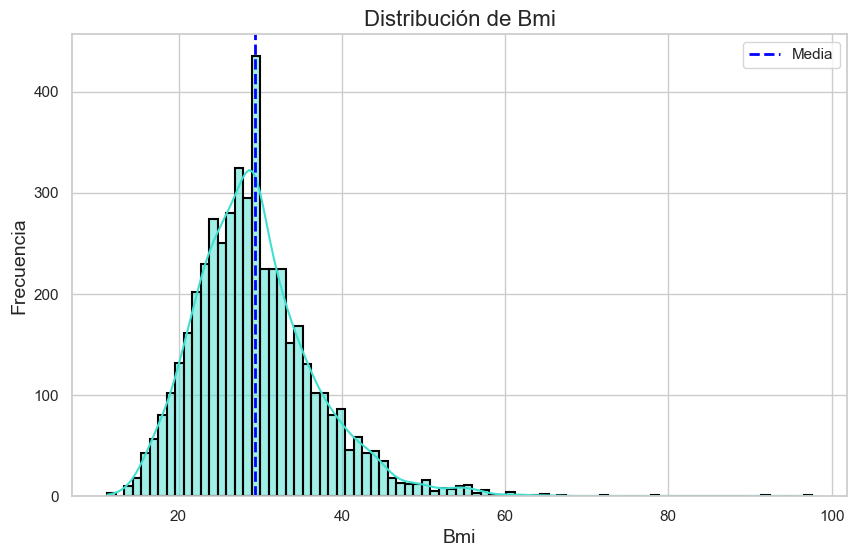

In [99]:
import seaborn as sns
sns.set(style = "whitegrid") #Estilo de seaborn 

plt.figure(figsize = (10,6)) #Gráfico de distribución 
sns.histplot(df_nuevo["Bmi"], kde = True, color = "turquoise", edgecolor = "black", linewidth = 1.5)


plt.title("Distribución de Bmi", fontsize = 16) # Agregar etiquetas al gráfico
plt.xlabel("Bmi", fontsize = 14)
plt.ylabel("Frecuencia", fontsize = 14)

plt.axvline(df_nuevo["Bmi"].mean(), color = "blue", linestyle = "--", linewidth = 2, label = "Media") #Añadimos una linea vertical para la media


plt.legend() #Imprimimos el gráfico
plt.show()


#### Cambio de tipo a las variables 

In [100]:
df_nuevo = df_Hos.copy()  # Hacer una copia del DataFrame original

# Convertir las columnas a tipos de datos específicos en el df_nuevo
columnas_convertir = ["Hypertension", "Heart_Disease", "Married", "Work", "Residence", "Smoking", "Gender","Age", "Stroke", "Children", "Grupo de Imc"]
tipos_datos = ["category", "category", "category", "category", "category", "category", "category","int64", "category", "category", "category", "category"]

for col, dtype in zip(columnas_convertir, tipos_datos):
    df_nuevo[col] = df_nuevo[col].astype(dtype)

In [101]:
df_nuevo.dtypes

Hypertension         category
Heart_Disease        category
Married              category
Work                 category
Residence            category
Avg_glucose_level     float64
Bmi                   float64
Smoking              category
Gender               category
Age                     int64
Income                float64
Children             category
Stroke               category
Grupo de Imc         category
dtype: object

### 1.3 Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la variable respuesta? 

#### Correlación Verdadera

In [102]:
df_numerico = df_nuevo.select_dtypes(include = ["float64", "int64"]) #Seleccionamos las columnas numéricas
correlacion_verdadera = df_numerico.corr() #Calcular la correlación entre las columnas numericas
correlacion_verdadera #Matriz de correlación


,Avg_glucose_level,Bmi,Age,Income
Avg_glucose_level,1.000000,-0.016509,0.238104,0.023798
Bmi,-0.016509,1.000000,-0.013964,0.026037
Age,0.238104,-0.013964,1.000000,0.178715
Income,0.023798,0.026037,0.178715,1.000000


In [103]:
 correlacion_verdadera > 0.6 #Hacemos otra tabla donde los valores mayores a 0.6 son verdaderos y los demás falsos. Haciendo una tabla tipo inversa en escalera. 

,Avg_glucose_level,Bmi,Age,Income
Avg_glucose_level,True,False,False,False
Bmi,False,True,False,False
Age,False,False,True,False
Income,False,False,False,True


In [104]:
from scipy.stats import chi2_contingency #Importamos libreria
#Columnas que son variables categoricas
columnas_categoricas = ["Hypertension", "Heart_Disease", "Married", "Work", "Residence", "Smoking", "Gender", "Stroke", "Children", "Grupo de Imc"]

matriz_cramer = np.zeros((len(columnas_categoricas), len(columnas_categoricas))) #Creamos una matriz para almacenar los valores de correlación de V Cramer


for i, col1 in enumerate(columnas_categoricas):  #Calcula la correlación de V cramer entre todas las combinaciones de columnas
    for j, col2 in enumerate(columnas_categoricas):
        tabla_contingencia = pd.crosstab(df_nuevo[col1], df_nuevo[col2])
        chi2,_,_,_ = chi2_contingency(tabla_contingencia)
        n = tabla_contingencia.sum().sum()
        filas, columnas = tabla_contingencia.shape
        cramer = np.sqrt(chi2 / (n*(min(filas, columnas)-1)))
        matriz_cramer[i, j] = cramer 

        
tabla_correlacion = pd.DataFrame(matriz_cramer, index = columnas_categoricas, columns = columnas_categoricas) #Crea el DataFrame para mostrar resultados
tabla_correlacion #Imprimimos resultados


,Hypertension,Heart_Disease,Married,Work,Residence,Smoking,Gender,Stroke,Children,Grupo de Imc
Hypertension,0.998890,0.116278,0.163766,0.162183,0.006724,0.143042,0.029795,0.126134,0.109003,0.182242
Heart_Disease,0.116278,1.000000,0.115044,0.096604,0.014093,0.069618,0.061128,0.134960,0.054786,0.104056
Married,0.163766,0.115044,0.999566,0.567194,0.006126,0.342584,0.033350,0.107307,0.377244,0.428767
Work,0.162183,0.096604,0.567194,1.000000,0.040676,0.261491,0.074589,0.130131,0.195424,0.258373
Residence,0.006724,0.014093,0.006126,0.040676,0.999609,0.034878,0.011345,0.014459,0.020976,0.031561
Smoking,0.143042,0.069618,0.342584,0.261491,0.034878,1.000000,0.074740,0.097350,0.143555,0.189618
Gender,0.029795,0.061128,0.033350,0.074589,0.011345,0.074740,1.000000,0.031010,0.040627,0.091788
Stroke,0.126134,0.134960,0.107307,0.130131,0.014459,0.097350,0.031010,0.997889,0.050647,0.157266
Children,0.109003,0.054786,0.377244,0.195424,0.020976,0.143555,0.040627,0.050647,1.000000,0.145573
Grupo de Imc,0.182242,0.104056,0.428767,0.258373,0.031561,0.189618,0.091788,0.157266,0.145573,1.000000


In [105]:
tabla_correlacion > 0.6 #Hacemos otra tabla donde los valores mayores a 0.6 son verdaderos y los demás falsos. Haciendo una tabla tipo inversa en escalera. 

,Hypertension,Heart_Disease,Married,Work,Residence,Smoking,Gender,Stroke,Children,Grupo de Imc
Hypertension,True,False,False,False,False,False,False,False,False,False
Heart_Disease,False,True,False,False,False,False,False,False,False,False
Married,False,False,True,False,False,False,False,False,False,False
Work,False,False,False,True,False,False,False,False,False,False
Residence,False,False,False,False,True,False,False,False,False,False
Smoking,False,False,False,False,False,True,False,False,False,False
Gender,False,False,False,False,False,False,True,False,False,False
Stroke,False,False,False,False,False,False,False,True,False,False
Children,False,False,False,False,False,False,False,False,True,False
Grupo de Imc,False,False,False,False,False,False,False,False,False,True


In [106]:
#A correlation Matrix is created 
corr_matrix = df_nuevo1.corr()

#The size of the graph is fitted to the data 
plt.figure(figsize=(50,30))

#The type of graph for the correlation is chosen
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#The graph is shown
plt.show()

NameError: name 'df_nuevo1' is not defined

## 1.4 Visualización de Datos: Visualice todas las variables predictivas y describa su distribución. Analice la distribución de la variable respuesta

## Categorias 

### Hipertención

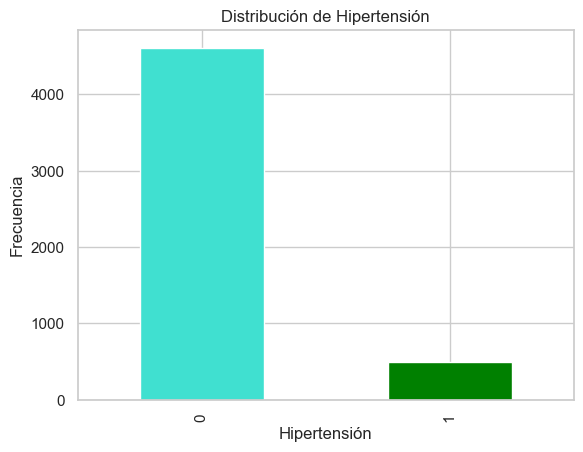

In [107]:
casos_hipertension = df_nuevo["Hypertension"].value_counts() #Contamos el numero de casos para cada categoria de Hipertensión

casos_hipertension.plot(kind = "bar", color = ["turquoise", "green"]) #Creamos el gráfico de barras

plt.title("Distribución de Hipertensión") # Agregar etiquetas al gráfico
plt.xlabel("Hipertensión")
plt.ylabel("Frecuencia")

plt.show() #Imprimimos el gráfico

## Heart_Disease

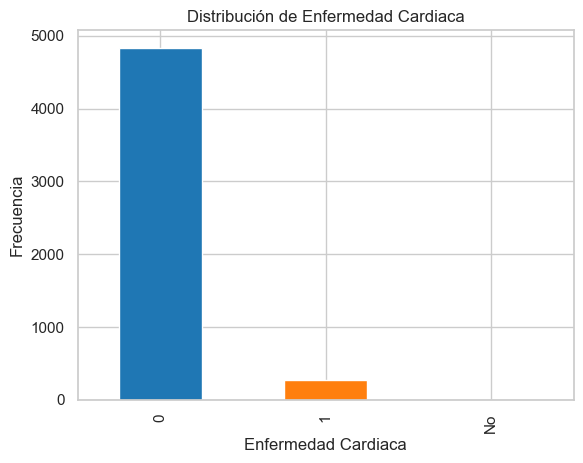

In [108]:

casos_cardiacos = df_nuevo["Heart_Disease"].value_counts() #Contamos el numero de casos para cada categoria de enfermedad cardiaca

colors = ["#1f77b4", "#ff7f0e"] #Azul obscuro y rojo claro

casos_cardiacos.plot(kind = "bar", color = colors) #Creamos el gráfico de barras

plt.title("Distribución de Enfermedad Cardiaca") # Agregar etiquetas al gráfico
plt.xlabel("Enfermedad Cardiaca")
plt.ylabel("Frecuencia")

plt.show() #Imprimimos el gráfico



## Married

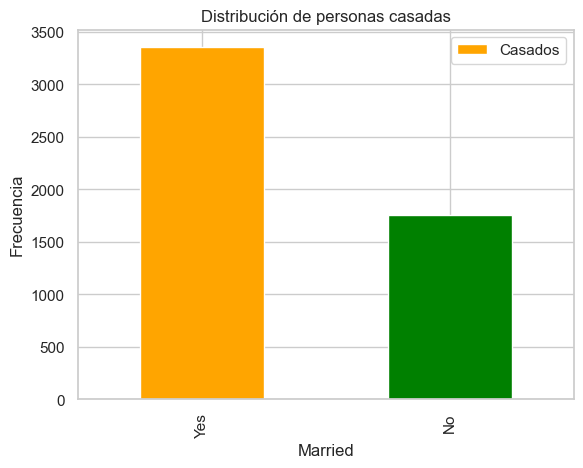

In [109]:

casos_Married = df_nuevo["Married"].value_counts() #Contamos el numero de casos para cada categoria de Married

a = casos_Married.plot(kind = "bar", color = ["orange", "green"]) #Creamos el gráfico de barras

plt.title("Distribución de personas casadas") # Agregar etiquetas al gráfico
plt.xlabel("Married")
plt.ylabel("Frecuencia")

plt.legend(["Casados", "Solteros"])

plt.show() #Imprimimos el gráfico


### Work 

In [110]:
df1 = df_Hos[df_Hos["Work"].isin(["dsfsdf", "ksdh-k", "sdfsdf", "sdsd-i"])] #llamamos la columna "Work" y vemos si coincide con alguna de las palabras especificadas en la lista.
df1

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
8,0,0,Yes,ksdh-k,Rural,76.15,NaN,Unknown,Female,59.0,121499.0,3,1,No valido
64,0,0,Yes,ksdh-k,Urban,104.72,NaN,Unknown,Male,75.0,105544.0,3,1,No valido
90,0,1,Yes,sdsd-i,Urban,226.98,29.8,never smoked,Female,79.0,180881.0,3,1,Sobrepeso
300,0,0,Yes,ksdh-k,Urban,81.51,28.5,Unknown,Female,53.0,11650.0,2,0,Sobrepeso
806,0,0,Yes,ksdh-k,Rural,114.32,26.4,never smoked,Male,39.0,92013.0,1,0,Sobrepeso
2787,0,0,Yes,dsfsdf,Rural,84.60,27.0,smokes,Female,42.0,442516.0,2,0,Sobrepeso
4832,0,0,No,sdfsdf,Urban,61.88,20.1,never smoked,Female,20.0,551530.0,2,0,Peso normal
5055,0,0,No,sdfsdf,Urban,92.06,25.3,smokes,Female,25.0,196052.0,2,0,Sobrepeso
5065,0,0,Yes,sdfsdf,Urban,89.01,37.4,never smoked,Female,31.0,596184.0,3,0,Obesidad Grado 2
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,NaN,2,0,Obesidad Grado 3


In [111]:
df_nuevo = df_nuevo[df_nuevo["Work"].isin(["Private", "Self-employed", "Govt_job", "children", "Never_worked"])] #Vemos si el DF coincide con alguna de las cadenas especificadas en la lista proporcionada.
df_nuevo


,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke,Grupo de Imc
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67,725445.0,3,1,Obesidad Grado 2
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61,235422.0,0,1,No valido
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80,278207.0,3,1,Obesidad Grado 1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49,22613.0,1,1,Obesidad Grado 1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79,48161.0,3,1,Peso normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35,37325.0,2,0,Obesidad Grado 1
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51,56478.0,0,0,Sobrepeso
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44,77772.0,0,0,Sobrepeso
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33,18883.0,3,0,Obesidad Grado 1


In [112]:
df_nuevo["Work"].unique() # Imprimimos los valores únicos presentes en la columna "Work" del DataFrame df_nuevo.

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (9, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', ..., 'dsfsdf', 'ksdh-k', 'sdfsdf', 'sdsd-i']

In [113]:
print(df_nuevo["Work"].value_counts()) # Imprimimos el recuento de cada valor único en la columna "Work" del DataFrame df_nuevo.

Private          2918
Self-employed     817
children          688
Govt_job          657
Never_worked       22
dsfsdf              0
ksdh-k             0
sdfsdf              0
sdsd-i              0
Name: Work, dtype: int64


C:\Users\enlop\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


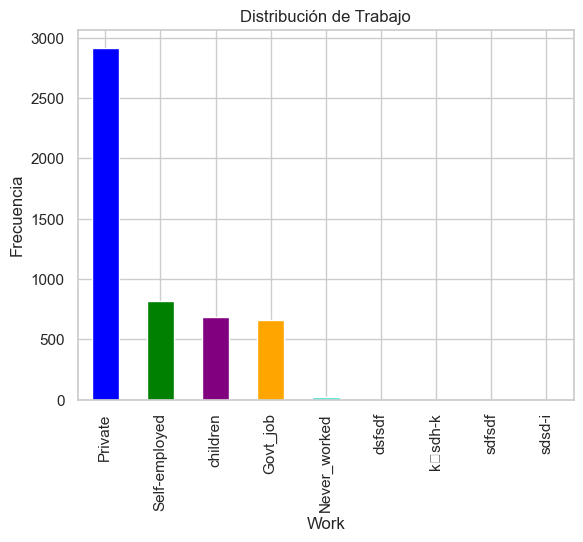

In [114]:
Work1 = df_nuevo["Work"].value_counts() #Se cuenta ek número de casos para cada categoría de Work. 

a = Work1.plot(kind = "bar", color = ["blue", "green", "purple", "orange", "turquoise"]) #Creamos el gráfico de barras

plt.title("Distribución de Trabajo") # Agregar etiquetas al gráfico
plt.xlabel("Work")
plt.ylabel("Frecuencia")

plt.show() #Imprimimos


## Residence 

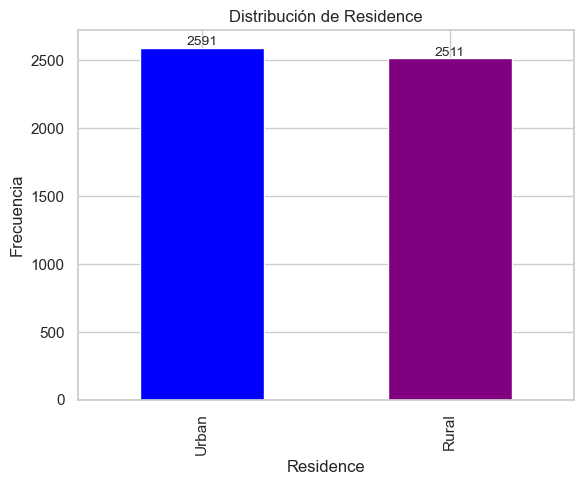

In [115]:
Residiencia = df_nuevo["Residence"].value_counts() #Se cuenta el número de casos para cada categoria en Residence

a = Residiencia.plot(kind = "bar", color = ["blue", "purple"]) #Creamos el gráfico de barras

plt.title("Distribución de Residence") # Agregar etiquetas al gráfico
plt.xlabel("Residence")
plt.ylabel("Frecuencia")

for i in a.containers: 
    a.bar_label(i, label_type = "edge", fontsize = 10) #Se muestra el porcentaje de cada barra

plt.show() #Imprimimos


### Smoking

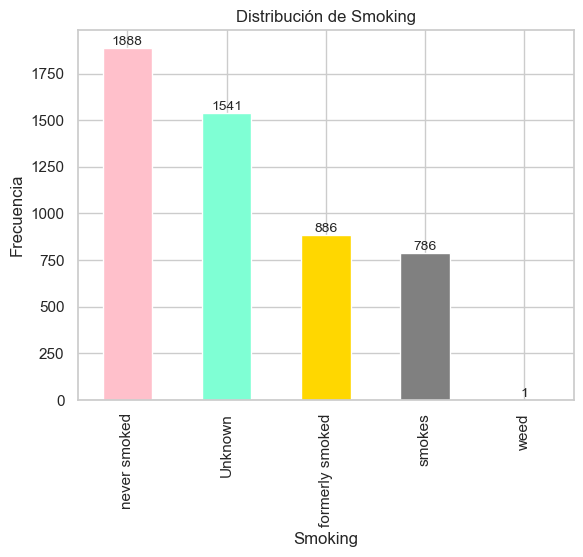

In [116]:
fumador = df_nuevo["Smoking"].value_counts() #Se cuenta el número de casos para categoría en Smoking

a = fumador.plot(kind = "bar", color = ["#FFC0CB", "#7FFFD4","#FFD700","#808080"]) #Creamos el gráfico de barras


plt.title("Distribución de Smoking") # Agregar etiquetas al gráfico
plt.xlabel("Smoking")
plt.ylabel("Frecuencia")

for i in a.containers: 
    a.bar_label(i, label_type = "edge", fontsize = 10) #Se muestra el porcentaje de cada barra

plt.show() #Imprimimos


### Gender

In [117]:
df_nuevo = df_nuevo[df_nuevo["Gender"]!= "Other"]

In [118]:
Others = (df_nuevo["Gender"] == "Other").mean()*100 #Vemos el porcentaje de pacientes para poder confirmar que se elimino
print(f"Porcentaje de pacientes Other: {Others:.2f}%")

Porcentaje de pacientes Other: 0.00%


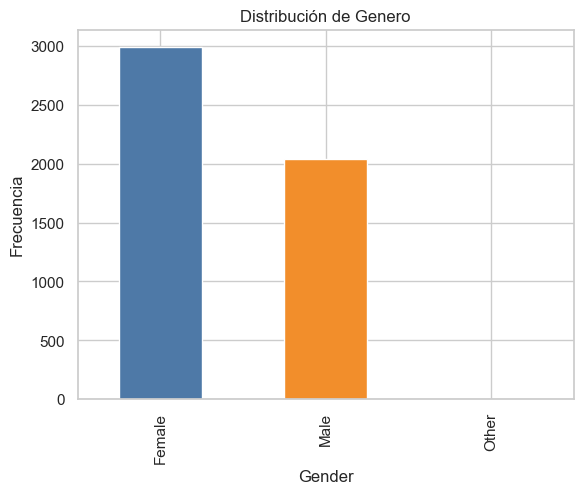

In [119]:
Genero = df_nuevo["Gender"].value_counts() #Contamos el número de casos para cada categoría en genero

Genero.plot(kind='bar', color=["#4e79a7", "#f28e2b"]) # Creamos un gráfico de barras

plt.title("Distribución de Genero") # Agregar etiquetas al gráfico
plt.xlabel("Gender")
plt.ylabel("Frecuencia")

plt.show() #Imprimimos

## Stroke

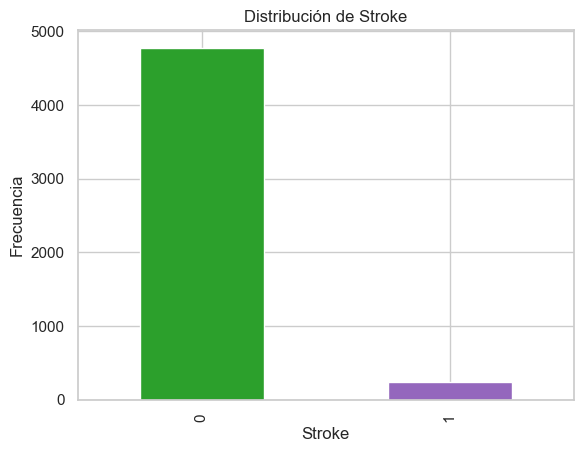

In [120]:
Stroke = df_nuevo["Stroke"].value_counts() #Contamos el número de casos para cada categoria en stroke


Stroke.plot(kind='bar', color=["#2ca02c","#9467bd"]) # Creamos un gráfico de barras

plt.title("Distribución de Stroke") # Agregar etiquetas al gráfico
plt.xlabel("Stroke")
plt.ylabel("Frecuencia")

plt.show() #Imprimimos



#### Children

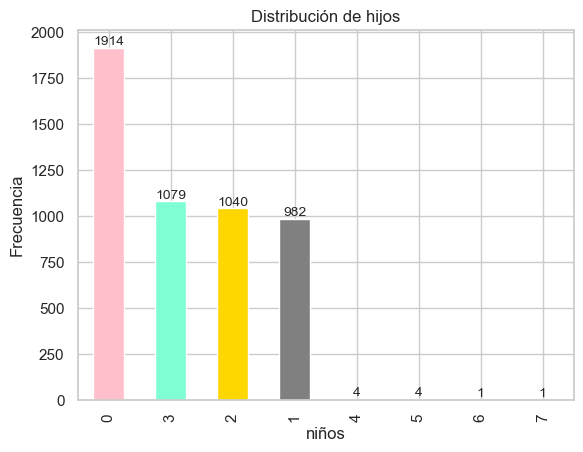

In [121]:

niños = df_nuevo["Children"].value_counts() #Se cuenta el número de casos para categoría en Smoking

a = niños.plot(kind = "bar", color = ["#FFC0CB", "#7FFFD4","#FFD700","#808080"]) #Creamos el gráfico de barras


plt.title("Distribución de hijos") # Agregar etiquetas al gráfico
plt.xlabel("niños")
plt.ylabel("Frecuencia")

for i in a.containers: 
    a.bar_label(i, label_type = "edge", fontsize = 10) #Se muestra el porcentaje de cada barra

plt.show() #Imprimimos


#### Grupo de IMC

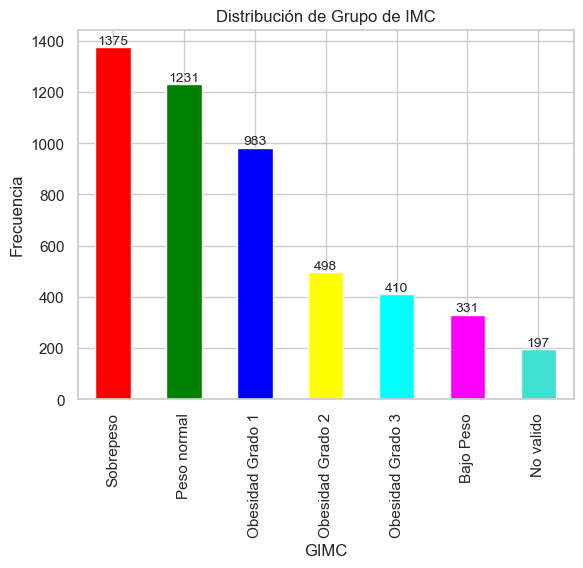

In [122]:
GIMC = df_nuevo["Grupo de Imc"].value_counts() #Se cuenta el número de casos para categoría en Smoking

a = GIMC.plot(kind = "bar", color = ["red", "green", "blue", "yellow", "cyan", "magenta", "tUrquoise"]) #Creamos el gráfico de barras


plt.title("Distribución de Grupo de IMC") # Agregar etiquetas al gráfico
plt.xlabel("GIMC")
plt.ylabel("Frecuencia")

for i in a.containers: 
    a.bar_label(i, label_type = "edge", fontsize = 10) #Se muestra el porcentaje de cada barra

plt.show() #Imprimimos

# Variables numéricas 


### Nivel promedio de glucosa en la sangre 

C:\Users\enlop\AppData\Local\Temp\ipykernel_33920\1521533613.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df_nuevo, x = "Avg_glucose_level", shade = True) #Creamos el gráfico de densidad


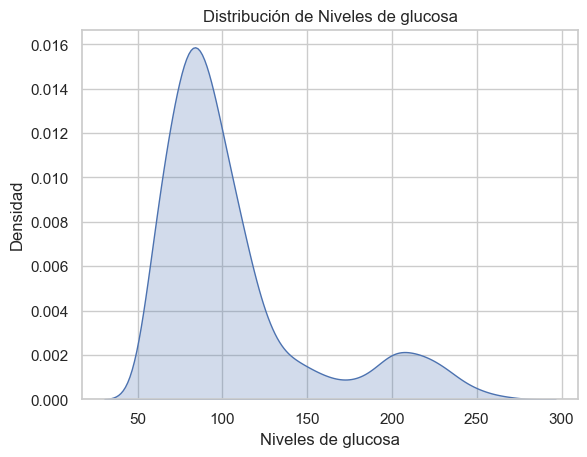

In [123]:
sns.kdeplot(data = df_nuevo, x = "Avg_glucose_level", shade = True) #Creamos el gráfico de densidad

plt.title("Distribución de Niveles de glucosa") # Agregar etiquetas al gráfico
plt.xlabel("Niveles de glucosa")
plt.ylabel("Densidad")

plt.show() #Muestra el gráfico



## BMI

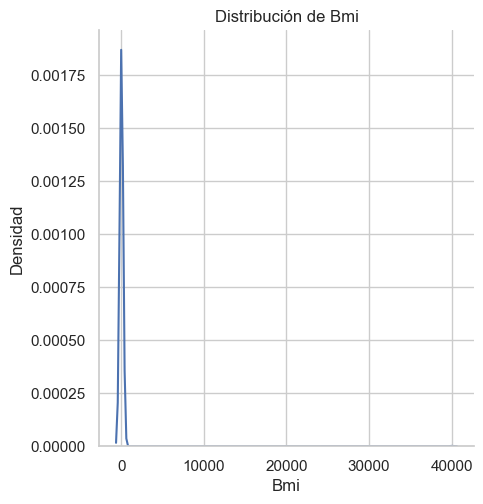

In [124]:
sns.displot(df_nuevo, x = "Bmi", kind = "kde") #Se crea el gráfico de densidad

plt.title("Distribución de Bmi") # Agregar etiquetas al gráfico
plt.xlabel("Bmi")
plt.ylabel("Densidad")

plt.show() #Muestra el gráfico



### AGE

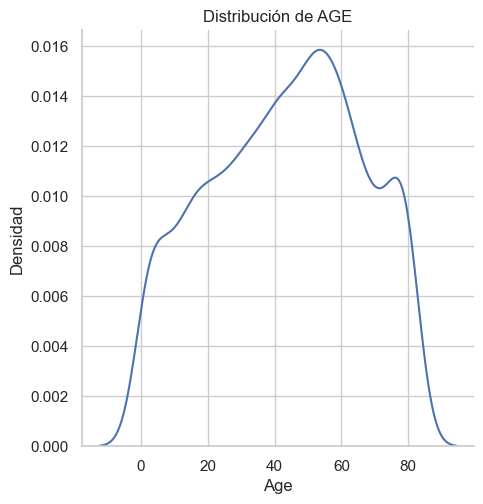

In [125]:
sns.displot(df_nuevo, x = "Age", kind = "kde") #Se crea el gráfico de densidad 


plt.title("Distribución de AGE") # Agregar etiquetas al gráfico
plt.xlabel("Age")
plt.ylabel("Densidad")

plt.show() #Muestra el gráfico


### Income

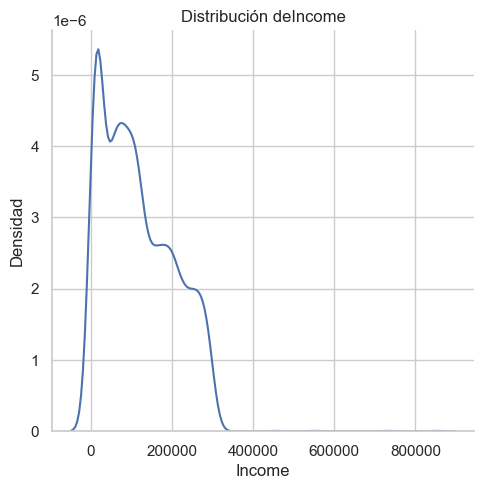

In [126]:
sns.displot(df_nuevo, x = "Income", kind = "kde") #Se crea el gráfico de densidad 


plt.title("Distribución deIncome") # Agregar etiquetas al gráfico
plt.xlabel("Income")
plt.ylabel("Densidad")

plt.show() #Muestra el gráfico

# 2. La base de datos no está balanceada. Investigue que es una base de datos no balanceada utilizando fuentes de referencia confiables, los problemas con este tipo de base de datos y al menos dos técnicas utilizadas durante el entrenamiento del algoritmo para reducir su efecto negativo

Una base de datos no balanceada, se da cuándo la distribución de clases (variables predictivas o de respuesta) en un conjunto de datos están altamente sesgadas. Por lo que se refiere a que un tipo de clase, la mayoritaria, tiene una representación de datos mucho mayor en comparación con otra u otras clases conocidas como minoritarias. Como consecuencia, puede existir sesgo en el set de entrenamiento, ya que los algoritmos pueden tender a favorecer a la clase mayoritaria, por lo que el modelo no resultaría efectivo para reconocer la clase minoritaria. También, puede exisistir una precisión inadecuada, ya que al reconocer mayormente una clase, no es capaz de resolver el problema requerido. Así mismo, se puede perder información, ya que la poca información de una variable, limita la capacidad del modelo de aprender ciertas características importantes. Sin embargo, se puede reducir los efectos de una base de datos no balanceada, mediante las técnicas de "Oversampling" que incrementa la representación de la clase minoritaria o "Undersampling" que reduce la cantidad de datos de la clase mayoritaria para balancear el set de datos. Por ende, se utilizará la técnica Synthetic Minority Over-sampling Technique y NearMiss

In [127]:
# Transformación a variables dummies
df_nuevo=pd.get_dummies(df_nuevo, drop_first=True) #con esto convertimos las variable categoricas en dummies
df_nuevo.columns

Index(['Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Hypertension_1',
       'Heart_Disease_1', 'Heart_Disease_No', 'Married_Yes',
       'Work_Never_worked', 'Work_Private', 'Work_Self-employed',
       'Work_children', 'Work_dsfsdf', 'Work_ksdh-k', 'Work_sdfsdf',
       'Work_sdsd-i', 'Residence_Urban', 'Smoking_formerly smoked',
       'Smoking_never smoked', 'Smoking_smokes', 'Smoking_weed', 'Gender_Male',
       'Gender_Other', 'Children_1', 'Children_2', 'Children_3', 'Children_4',
       'Children_5', 'Children_6', 'Children_7', 'Stroke_1',
       'Grupo de Imc_No valido', 'Grupo de Imc_Obesidad Grado 1',
       'Grupo de Imc_Obesidad Grado 2', 'Grupo de Imc_Obesidad Grado 3',
       'Grupo de Imc_Peso normal', 'Grupo de Imc_Sobrepeso'],
      dtype='object')

In [128]:
df_nuevo1=df_nuevo*1 #para convertir de false o true a 1 o 0

In [129]:
df_nuevo1

,Avg_glucose_level,Bmi,Age,Income,Hypertension_1,Heart_Disease_1,Heart_Disease_No,Married_Yes,Work_Never_worked,Work_Private,...,Children_5,Children_6,Children_7,Stroke_1,Grupo de Imc_No valido,Grupo de Imc_Obesidad Grado 1,Grupo de Imc_Obesidad Grado 2,Grupo de Imc_Obesidad Grado 3,Grupo de Imc_Peso normal,Grupo de Imc_Sobrepeso
0,228.69,36.6,67,725445.0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,202.21,NaN,61,235422.0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,105.92,32.5,80,278207.0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
3,171.23,34.4,49,22613.0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
4,174.12,24.0,79,48161.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,82.99,30.6,35,37325.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5108,166.29,25.6,51,56478.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5109,85.28,26.2,44,77772.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5110,90.51,31.0,33,18883.0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
print(df_nuevo1.isnull().sum())

Avg_glucose_level                  0
Bmi                              197
Age                                0
Income                            26
Hypertension_1                     0
Heart_Disease_1                    0
Heart_Disease_No                   0
Married_Yes                        0
Work_Never_worked                  0
Work_Private                       0
Work_Self-employed                 0
Work_children                      0
Work_dsfsdf                        0
Work_ksdh-k                       0
Work_sdfsdf                        0
Work_sdsd-i                        0
Residence_Urban                    0
Smoking_formerly smoked            0
Smoking_never smoked               0
Smoking_smokes                     0
Smoking_weed                       0
Gender_Male                        0
Gender_Other                       0
Children_1                         0
Children_2                         0
Children_3                         0
Children_4                         0
C

In [131]:
df_nuevo1['Bmi'].fillna(0, inplace=True)
df_nuevo1['Income'].fillna(0, inplace=True)
# Reemplazamos los nulos con 0


In [132]:
print(df_nuevo1.isnull().sum()) #verificamos nuevamente si existen nulos y se aprecia que no hay en ninguna variable

Avg_glucose_level                0
Bmi                              0
Age                              0
Income                           0
Hypertension_1                   0
Heart_Disease_1                  0
Heart_Disease_No                 0
Married_Yes                      0
Work_Never_worked                0
Work_Private                     0
Work_Self-employed               0
Work_children                    0
Work_dsfsdf                      0
Work_ksdh-k                     0
Work_sdfsdf                      0
Work_sdsd-i                      0
Residence_Urban                  0
Smoking_formerly smoked          0
Smoking_never smoked             0
Smoking_smokes                   0
Smoking_weed                     0
Gender_Male                      0
Gender_Other                     0
Children_1                       0
Children_2                       0
Children_3                       0
Children_4                       0
Children_5                       0
Children_6          

In [133]:
#Procedemos a borrar las columnas que no son necesarias, ya que no cuentan con informacion clara
df_nuevo1.drop(columns=['Work_dsfsdf', 'Work_ksdh-k', 'Work_sdfsdf', 'Work_sdsd-i', 'Gender_Other'], inplace=True)


In [134]:
df_nuevo1

,Avg_glucose_level,Bmi,Age,Income,Hypertension_1,Heart_Disease_1,Heart_Disease_No,Married_Yes,Work_Never_worked,Work_Private,...,Children_5,Children_6,Children_7,Stroke_1,Grupo de Imc_No valido,Grupo de Imc_Obesidad Grado 1,Grupo de Imc_Obesidad Grado 2,Grupo de Imc_Obesidad Grado 3,Grupo de Imc_Peso normal,Grupo de Imc_Sobrepeso
0,228.69,36.6,67,725445.0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,202.21,0.0,61,235422.0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,105.92,32.5,80,278207.0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
3,171.23,34.4,49,22613.0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
4,174.12,24.0,79,48161.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,82.99,30.6,35,37325.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5108,166.29,25.6,51,56478.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5109,85.28,26.2,44,77772.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5110,90.51,31.0,33,18883.0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [135]:
df_nuevo1.isnull().sum()

Avg_glucose_level                0
Bmi                              0
Age                              0
Income                           0
Hypertension_1                   0
Heart_Disease_1                  0
Heart_Disease_No                 0
Married_Yes                      0
Work_Never_worked                0
Work_Private                     0
Work_Self-employed               0
Work_children                    0
Residence_Urban                  0
Smoking_formerly smoked          0
Smoking_never smoked             0
Smoking_smokes                   0
Smoking_weed                     0
Gender_Male                      0
Children_1                       0
Children_2                       0
Children_3                       0
Children_4                       0
Children_5                       0
Children_6                       0
Children_7                       0
Stroke_1                         0
Grupo de Imc_No valido           0
Grupo de Imc_Obesidad Grado 1    0
Grupo de Imc_Obesida

In [136]:
# Vamos a utilizar Lasso, para asi poder encontrar las variables significativas
from sklearn.linear_model import LassoCV
import numpy as np



x_var = df_nuevo1.drop('Stroke_1', axis=1) #se usa drop con Stroke_1 porque esta es la variable respuesta
y_var = df_nuevo1['Stroke_1'] #Aqui solo se utiliza Stroke_1 porque es la variable que queremos predecir

# Basado en los datos que tenemos, se ha puesto el alpha de la siguiente manera
alfa = np.logspace(-5, 2, 100)

# Se crea el objeto LassoCV
m_1 = LassoCV(alphas=alfa, cv=30)

# Se entrena el modelo
m_1.fit(x_var, y_var)

# Se obtienen las variables x que son significativas y que van a ser utlizadas
variables_sig = x_var.columns[m_1.coef_ != 0]
print(variables_sig)

Index(['Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Hypertension_1',
       'Heart_Disease_1', 'Married_Yes', 'Work_Private', 'Work_Self-employed',
       'Work_children', 'Residence_Urban', 'Smoking_formerly smoked',
       'Smoking_never smoked', 'Smoking_smokes', 'Children_1', 'Children_2',
       'Children_3', 'Grupo de Imc_No valido', 'Grupo de Imc_Obesidad Grado 1',
       'Grupo de Imc_Obesidad Grado 2', 'Grupo de Imc_Peso normal'],
      dtype='object')


In [137]:
# Procedemos a crear un nuevo dataframe con las variables que han salido en el codigo anterior, ya que son significativas
df_vs=df_nuevo1[['Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Hypertension_1',
       'Heart_Disease_1', 'Married_Yes', 'Work_Private', 'Work_Self-employed',
       'Work_children', 'Residence_Urban', 'Smoking_formerly smoked',
       'Smoking_never smoked', 'Smoking_smokes', 'Children_1', 'Children_2',
       'Children_3', 'Grupo de Imc_No valido', 'Grupo de Imc_Obesidad Grado 1',
       'Grupo de Imc_Obesidad Grado 2', 'Grupo de Imc_Peso normal','Stroke_1' ]]
df_vs

,Avg_glucose_level,Bmi,Age,Income,Hypertension_1,Heart_Disease_1,Married_Yes,Work_Private,Work_Self-employed,Work_children,...,Smoking_never smoked,Smoking_smokes,Children_1,Children_2,Children_3,Grupo de Imc_No valido,Grupo de Imc_Obesidad Grado 1,Grupo de Imc_Obesidad Grado 2,Grupo de Imc_Peso normal,Stroke_1
0,228.69,36.6,67,725445.0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1,202.21,0.0,61,235422.0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,105.92,32.5,80,278207.0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,171.23,34.4,49,22613.0,0,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1
4,174.12,24.0,79,48161.0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,82.99,30.6,35,37325.0,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
5108,166.29,25.6,51,56478.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5109,85.28,26.2,44,77772.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5110,90.51,31.0,33,18883.0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0


# Oversampling


### Synthetic Minority Over-sampling Technique

In [138]:
from imblearn.over_sampling import SMOTE
import pandas as pd

In [139]:
df_vs.columns

Index(['Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Hypertension_1',
       'Heart_Disease_1', 'Married_Yes', 'Work_Private', 'Work_Self-employed',
       'Work_children', 'Residence_Urban', 'Smoking_formerly smoked',
       'Smoking_never smoked', 'Smoking_smokes', 'Children_1', 'Children_2',
       'Children_3', 'Grupo de Imc_No valido', 'Grupo de Imc_Obesidad Grado 1',
       'Grupo de Imc_Obesidad Grado 2', 'Grupo de Imc_Peso normal',
       'Stroke_1'],
      dtype='object')

In [146]:
# Se pone que variables son independientes y de respuesta 
#x_var= df_vs.drop('Stroke_1', axis=1)
#y_var = df_vs['Stroke_1']

# Se hace uso de la tecnica
st = SMOTE()
x_rm, y_rm = st.fit_resample(x_var, y_var)

# Se ve como esta la distribucion antes de la tecnica
print('Antes de Oversampling:')
print(y_var.value_counts())

print('Despues de Oversampling:')
print(y_rm.value_counts())

Antes de Oversampling:
0    4779
1     246
Name: Stroke_1, dtype: int64
Despues de Oversampling:
1    4779
0    4779
Name: Stroke_1, dtype: int64


In [147]:
# Convertimos en datafram 
rm_x= pd.DataFrame(x_rm, columns=x_var.columns)
rm_y = pd.DataFrame(y_rm, columns=['Stroke_1'])

# Juntamos las dos partes del dataframe
df_os = pd.concat([rm_x, rm_y], axis=1)

# Imprimir las 5 primeras filas del dataframe resultante
df_os.head()

,Avg_glucose_level,Bmi,Age,Income,Hypertension_1,Heart_Disease_1,Heart_Disease_No,Married_Yes,Work_Never_worked,Work_Private,...,Children_5,Children_6,Children_7,Grupo de Imc_No valido,Grupo de Imc_Obesidad Grado 1,Grupo de Imc_Obesidad Grado 2,Grupo de Imc_Obesidad Grado 3,Grupo de Imc_Peso normal,Grupo de Imc_Sobrepeso,Stroke_1
0,228.69,36.6,67,725445.0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1,202.21,0.0,61,235422.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,105.92,32.5,80,278207.0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,171.23,34.4,49,22613.0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,174.12,24.0,79,48161.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [148]:
#Se normaliza las variables numericas
from sklearn.preprocessing import StandardScaler

# Separamos la variable Stroke_1 de las predictivas, ya que es la variable respuesta
x_num= df_vs.drop('Stroke_1', axis=1)
y_num = df_vs['Stroke_1']

# Las columnas que deben ser normalizados son las siguientes
norm_col = ['Avg_glucose_level', 'Bmi', 'Age']

# Crear una copia del original
norm_x = x_num.copy()

# Las columnas que hemos seleccionado, se normalizan
scaler = StandardScaler()
norm_x[norm_col] = scaler.fit_transform(norm_x[norm_col])

# Finalmente unimos las dos partes con .concat
df_nuevo2 = pd.concat([norm_x, y_num], axis=1)

# Imprimir las 5 primeras filas del dataframe resultante
df_nuevo2

,Avg_glucose_level,Bmi,Age,Income,Hypertension_1,Heart_Disease_1,Married_Yes,Work_Private,Work_Self-employed,Work_children,...,Smoking_never smoked,Smoking_smokes,Children_1,Children_2,Children_3,Grupo de Imc_No valido,Grupo de Imc_Obesidad Grado 1,Grupo de Imc_Obesidad Grado 2,Grupo de Imc_Peso normal,Stroke_1
0,2.709511,-0.020373,1.050076,725445.0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1,2.124295,-0.052838,0.785280,235422.0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,-0.003743,-0.024010,1.623801,278207.0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,1.439628,-0.022324,0.255688,22613.0,0,0,1,1,0,0,...,0,1,1,0,0,0,1,0,0,1
4,1.503498,-0.031549,1.579668,48161.0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,-0.510503,-0.025695,-0.362169,37325.0,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
5108,1.330453,-0.030130,0.343954,56478.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5109,-0.459893,-0.029598,0.035025,77772.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5110,-0.344308,-0.025340,-0.450434,18883.0,1,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0


# Undersampling

### NearMiss

In [149]:
from imblearn.under_sampling import NearMiss
import pandas as pd

In [150]:
# Hemos mandado la variable Stroke_1 a la variable de respuesta, por lo que se hace lo siguiente
x_nm= df_vs.drop('Stroke_1', axis=1)
y_nm= df_vs['Stroke_1']

# Aplicamos la tecnica de NearMiss
nm = NearMiss()
xnm_rs, ynm_rs = nm.fit_resample(x_nm, y_nm)

# Se imprime la distribucion de antes y despues de haber utlizado la tecnica
print('Antes de undesampling:')
print(y_nm.value_counts())
print('------------------------')
print('Despues de undersampling:')
print(ynm_rs.value_counts())

Antes de undesampling:
0    4779
1     246
Name: Stroke_1, dtype: int64
------------------------
Despues de undersampling:
0    246
1    246
Name: Stroke_1, dtype: int64


In [151]:
# Se crea el nuevo dataframe
x_rs_df = pd.DataFrame(xnm_rs, columns=x_nm.columns)
y_rs_df = pd.DataFrame(ynm_rs, columns=['Stroke_1'])

# Unimos ambas partrs con .concat
df_us = pd.concat([x_rs_df, y_rs_df], axis=1)


df_us.head()

,Avg_glucose_level,Bmi,Age,Income,Hypertension_1,Heart_Disease_1,Married_Yes,Work_Private,Work_Self-employed,Work_children,...,Smoking_never smoked,Smoking_smokes,Children_1,Children_2,Children_3,Grupo de Imc_No valido,Grupo de Imc_Obesidad Grado 1,Grupo de Imc_Obesidad Grado 2,Grupo de Imc_Peso normal,Stroke_1
0,186.45,26.7,71,0.0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,170.22,27.2,52,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173.43,25.6,17,0.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,120.25,28.2,52,0.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,109.82,23.7,59,0.0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0


# 3. Divida la base de datos en un set de entrenamiento, un set de validación y un set de prueba. Justifique en base a la literatura el porcentaje de datos que se va a cada set

Se ha decidido que será 65% en entrenamiento, 20% en validación y 15% en prueba

In [152]:
from sklearn.model_selection import train_test_split

## Oversampling 1

In [153]:
x_1 = df_os.drop('Stroke_1', axis=1) # ya que esta es la variable de respuesta
y_1= df_os['Stroke_1']

In [154]:
x1_ent, x1_val_prue, y1_ent, y1_val_prue = train_test_split(x_1, y_1, test_size=0.35, random_state=1)
x1_val, x1_prue, y1_val, y1_prue = train_test_split(x1_val_prue, y1_val_prue, test_size=0.428571428571, random_state=1)
print('Entrenamiento X  : ', x1_ent.shape)
print('Entrenamiento y : ', y1_ent.shape)
print('Validacion X : ', x1_val.shape)
print('Validacio y : ', y1_val.shape)
print('Prueba X : ', x1_prue.shape)
print('Prueba y : ', y1_prue.shape)

Entrenamiento X  :  (6212, 31)
Entrenamiento y :  (6212,)
Validacion X :  (1912, 31)
Validacio y :  (1912,)
Prueba X :  (1434, 31)
Prueba y :  (1434,)


## Undersampling 2

In [155]:
x_2= df_us.drop('Stroke_1', axis=1) # ya que esta es la variable de respuesta
y_2= df_us['Stroke_1']

In [156]:
x2_ent, x2_val_prue, y2_ent, y2_val_prue = train_test_split(x_2, y_2, test_size=0.35, random_state=1)
x2_val, x2_prue, y2_val, y2_prue = train_test_split(x2_val_prue, y2_val_prue, test_size=0.428571428571, random_state=1)
print('Entrenamiento X  : ', x2_ent.shape)
print('Entrenamiento y : ', y2_ent.shape)
print('Validacion X : ', x2_val.shape)
print('Validacio y : ', y2_val.shape)
print('Prueba X : ', x2_prue.shape)
print('Prueba y : ', y2_prue.shape)

Entrenamiento X  :  (319, 21)
Entrenamiento y :  (319,)
Validacion X :  (98, 21)
Validacio y :  (98,)
Prueba X :  (75, 21)
Prueba y :  (75,)


# 4. Implemente un algoritmo y estadísticamente pruebe cuál de las dos técnicas mencionadas en el punto anterior mejora la predicción.

Se implemento el algoritmo de regresion logistica


In [157]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#!conda install -c conda-forge mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


In [158]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [159]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from sklearn.neighbors import KNeighborsClassifier

In [165]:
# Define the KNN model
model = KNeighborsClassifier(n_neighbors=6)

# Define the number of folds for cross-validation
n_folds = 5


# Perform cross-validation on the models trained on the balanced data
os_scores = cross_val_score(model, x_1, y_1, cv=n_folds, scoring='accuracy')
us_scores = cross_val_score(model, x_2, y_2, cv=n_folds, scoring='accuracy')
orig_scores = cross_val_score(model, x_var, y_var, cv=n_folds, scoring='accuracy')

# Create a list with the scores of each model
scores = [os_scores, us_scores, orig_scores]

# Perform the Friedman test
result = friedmanchisquare(*scores)

# Print the results
print(f"Accuracy of Random Over Sampler model: {os_scores.mean():.3f}")
print(f"Accuracy of Random Under Sampler model: {us_scores.mean():.3f}")

Accuracy of Random Over Sampler model: 0.704
Accuracy of Random Under Sampler model: 0.744


In [166]:
result

FriedmanchisquareResult(statistic=7.6000000000000085, pvalue=0.0223707718561655)

# 5. Aplique al menos 4 algoritmos en la base de datos utilizando la mejor estrategia de entrenamiento descubierta en el punto 4

### 5.1 Al menos 1 algoritmos debe ser un ensamble. 

Algoritmo 1 - Random Forest Classfier

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [170]:
# Definir el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)

# Entrenar el modelo con el conjunto de datos de entrenamiento
random_forest.fit(x2_ent, y2_ent)

# Predecir los valores de la variable de respuesta para los conjuntos de datos de validación y prueba
yrf_ent_pred = random_forest.predict(x2_ent)
yrf_val_pred = random_forest.predict(x2_val)
yrf_test_pred = random_forest.predict(x2_prue)

# Calcular la precisión del modelo en los conjuntos de datos de validación y prueba
ent_acc = accuracy_score(y2_ent, yrf_ent_pred)
val_acc = accuracy_score(y2_val, yrf_val_pred)
test_acc = accuracy_score(y2_prue, yrf_test_pred)

print("Precisión en el conjunto de datos de validación:", ent_acc)
print("Precisión en el conjunto de datos de validación:", val_acc)
print("Precisión en el conjunto de datos de prueba:", test_acc)

Precisión en el conjunto de datos de validación: 0.8996865203761756
Precisión en el conjunto de datos de validación: 0.7959183673469388
Precisión en el conjunto de datos de prueba: 0.8


### 5.2 Al menos 1 algoritmo debe ser un modelo no visto en clase (debe investigar y entender cómo funciona el modelo y como realiza la predicción, incluya está descripción en la presentación). 

Algoritmo 2 - Redes Neuronales

In [204]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [294]:
# Calcular el número de características (número de columnas en x2_ent)
num_features = x2_ent.shape[1]

# Definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),  # Capa oculta con 64 neuronas
    tf.keras.layers.Dense(32, activation='relu'),  # Capa oculta con 32 neuronas
    tf.keras.layers.Dense(1)  # Capa de salida (una neurona para la regresión)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(x2_ent, y2_ent, epochs=50, validation_data=(x2_val, y2_val))

# Hacer predicciones con el modelo entrenado
predictions_train = model.predict(x2_ent)
predictions_val = model.predict(x2_val)
predictions_test = model.predict(x2_prue)

Epoch 1/50


C:\Users\enlop\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2498769.2500 - val_loss: 147225.5469
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 233077.0156 - val_loss: 7498.1372
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 79668.7500 - val_loss: 231.8313
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35491.7305 - val_loss: 6418.7773
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13452.8018 - val_loss: 8314.1533
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4152.5225 - val_loss: 1313.8298
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 668.8858 - val_loss: 1059.4813
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 575.9445 - val_loss: 1230.6805
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 765.5605 - val_loss: 285.3458
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 251.8953 - val_loss: 52.6194
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 139.5010 - val_loss: 71.8614
Epoch 12/50
1

### 5.3 Para al menos 2 algoritmos utilice un método de optimización de hiperparámetros. Mencione los rangos en los cuáles se buscó los mejores hiperparámetros. 

Algoritmo 3 - Regresion Logistica, Hiperparametro GridSearch

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [302]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Valores de C a probar
}

logistic_regression = LogisticRegression(solver='liblinear', max_iter=1000)
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x2_ent, y2_ent)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [303]:
best_model = grid_search.best_estimator_

ent_accuracy = best_model.score(x2_ent, y2_ent)
val_accuracy = best_model.score(x2_val, y2_val)
prue_accuracy = best_model.score(x2_prue, y2_prue)

print("Exactitud del mejor modelo en el conjunto de entrenamiento:", ent_accuracy)
print("Exactitud del mejor modelo en el conjunto de validación:", val_accuracy)
print("Exactitud del mejor modelo en el conjunto de prueba:", prue_accuracy)
print("Best parameters:", best_model)

Exactitud del mejor modelo en el conjunto de entrenamiento: 0.7931034482758621
Exactitud del mejor modelo en el conjunto de validación: 0.7244897959183674
Exactitud del mejor modelo en el conjunto de prueba: 0.7333333333333333
Best parameters: LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')


Algoritmo 4 - Decision Tree classifier, Hiperparametro randomized search

In [229]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

In [268]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
x2_ent, x2_val_prue, y2_ent, y2_val_prue = train_test_split(x_2, y_2, test_size=0.35, random_state=1)
x2_val, x2_prue, y2_val, y2_prue = train_test_split(x2_val_prue, y2_val_prue, test_size=0.428571428571, random_state=1)

# Definir el modelo de árbol de decisión
dt_classifier = DecisionTreeClassifier()

# Definir la grilla de parámetros a explorar
param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Configurar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=1)

# Ajustar el modelo con la búsqueda aleatoria en el conjunto de entrenamiento
random_search.fit(x2_ent, y2_ent)

# Obtener el mejor modelo y los mejores parámetros
best_dt_classifier = random_search.best_estimator_

# Evaluar el modelo en los conjuntos de entrenamiento, validación y prueba
y2_ent_pred = best_dt_classifier.predict(x2_ent)
y2_val_pred = best_dt_classifier.predict(x2_val)
y2_prue_pred = best_dt_classifier.predict(x2_prue)

# Calcular y mostrar la precisión (accuracy) en cada conjunto
accuracy_ent = accuracy_score(y2_ent, y2_ent_pred)
accuracy_val = accuracy_score(y2_val, y2_val_pred)
accuracy_prue = accuracy_score(y2_prue, y2_prue_pred)

print("Accuracy on training set: {:.2f}%".format(accuracy_ent * 100))
print("Accuracy on validation set: {:.2f}%".format(accuracy_val * 100))
print("Accuracy on test set: {:.2f}%".format(accuracy_prue * 100))

# Mostrar los mejores parámetros encontrados
print("Best Parameters:", random_search.best_params_)

Accuracy on training set: 86.21%
Accuracy on validation set: 82.65%
Accuracy on test set: 86.67%
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 11}


# 6. Evalué cada modelo

### 6.1 Calcule la matriz de confusión, exactitud, sensibilidad, especificidad, precisión, AUC y curva ROC para cada algoritmo en el set de entrenamiento, validación y prueba.

Algoritmo 1 - Random Forest

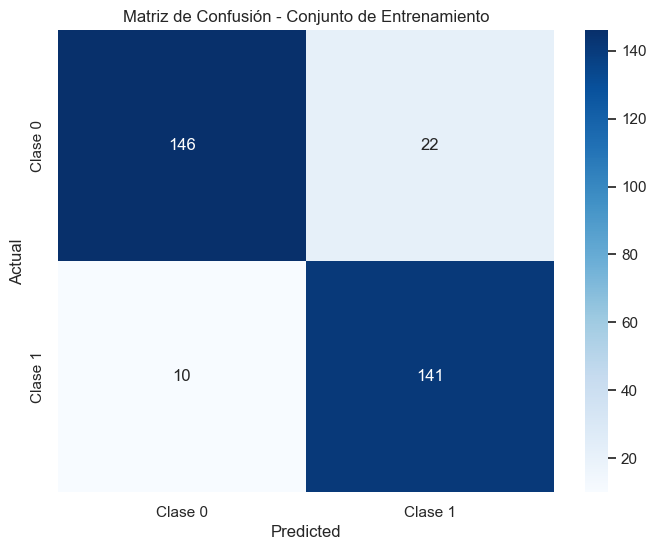

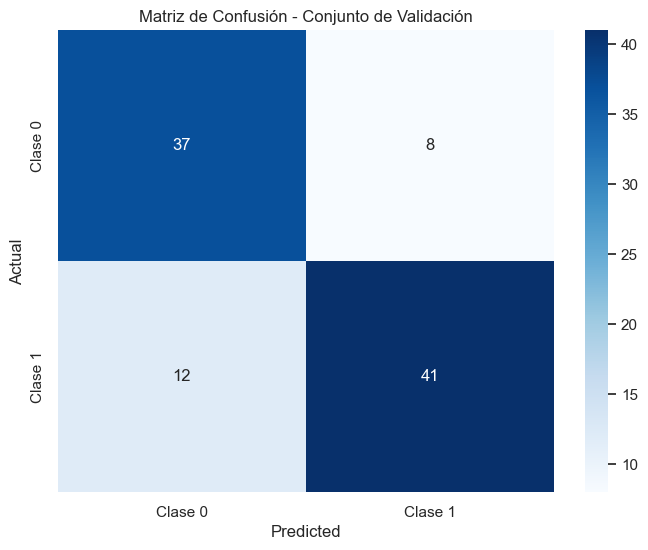

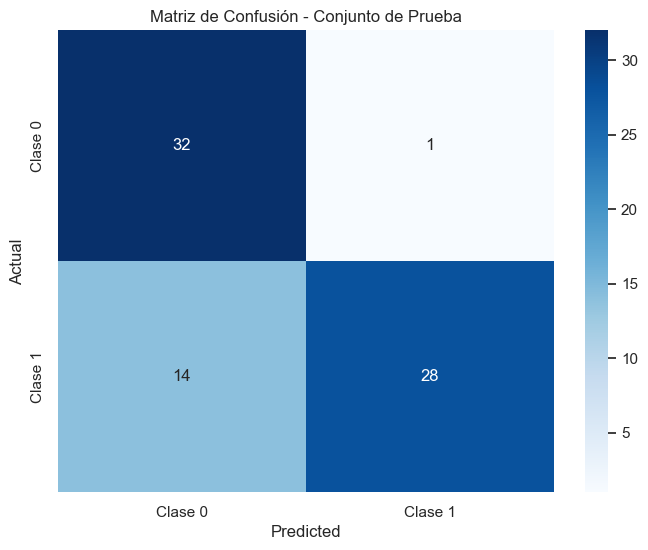

In [235]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Clase 0', 'Clase 1'], 
                yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Obtener las clases predichas (convertir a clases binarias si es necesario)
y_pred_train = (yrf_ent_pred > 0.5).astype(int)  # Ejemplo de umbral de clasificación
y_pred_val = (yrf_val_pred > 0.5).astype(int)
y_pred_test = (yrf_test_pred > 0.5).astype(int)

# Matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(y2_ent, y_pred_train, title='Matriz de Confusión - Conjunto de Entrenamiento')

# Matriz de confusión para el conjunto de validación
plot_confusion_matrix(y2_val, y_pred_val, title='Matriz de Confusión - Conjunto de Validación')

# Matriz de confusión para el conjunto de prueba
plot_confusion_matrix(y2_prue, y_pred_test, title='Matriz de Confusión - Conjunto de Prueba')

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Definir el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5)

# Entrenar el modelo con el conjunto de datos de entrenamiento
random_forest.fit(x2_ent, y2_ent)

# Función para calcular métricas de evaluación
def calcular_metricas(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    return acc, prec, rec, specificity, f1

# Calcular métricas para el conjunto de datos de entrenamiento
ent_acc, ent_prec, ent_rec, ent_spec, ent_f1 = calcular_metricas(y2_ent, random_forest.predict(x2_ent))

# Calcular métricas para el conjunto de datos de validación
val_acc, val_prec, val_rec, val_spec, val_f1 = calcular_metricas(y2_val, random_forest.predict(x2_val))

# Calcular métricas para el conjunto de datos de prueba
test_acc, test_prec, test_rec, test_spec, test_f1 = calcular_metricas(y2_prue, random_forest.predict(x2_prue))

# Imprimir métricas para cada conjunto de datos
print("Métricas para el conjunto de datos de entrenamiento:")
print("Exactitud:", ent_acc)
print("Precisión:", ent_prec)
print("Sensibilidad (Recall):", ent_rec)
print("Especificidad:", ent_spec)
print("F1-score:", ent_f1)

print("\nMétricas para el conjunto de datos de validación:")
print("Exactitud:", val_acc)
print("Precisión:", val_prec)
print("Sensibilidad (Recall):", val_rec)
print("Especificidad:", val_spec)
print("F1-score:", val_f1)

print("\nMétricas para el conjunto de datos de prueba:")
print("Exactitud:", test_acc)
print("Precisión:", test_prec)
print("Sensibilidad (Recall):", test_rec)
print("Especificidad:", test_spec)
print("F1-score:", test_f1)

Métricas para el conjunto de datos de entrenamiento:
Exactitud: 0.896551724137931
Precisión: 0.8641975308641975
Sensibilidad (Recall): 0.9271523178807947
Especificidad: 0.8690476190476191
F1-score: 0.8945686900958466

Métricas para el conjunto de datos de validación:
Exactitud: 0.7857142857142857
Precisión: 0.82
Sensibilidad (Recall): 0.7735849056603774
Especificidad: 0.8
F1-score: 0.796116504854369

Métricas para el conjunto de datos de prueba:
Exactitud: 0.8133333333333334
Precisión: 0.9666666666666667
Sensibilidad (Recall): 0.6904761904761905
Especificidad: 0.9696969696969697
F1-score: 0.8055555555555556


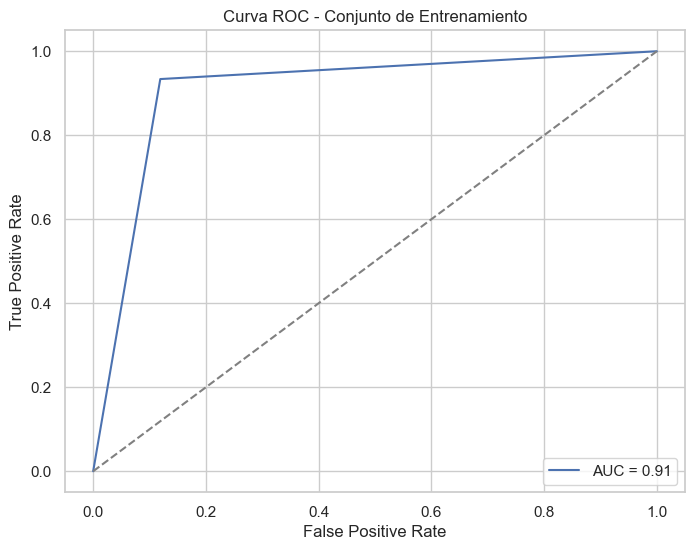

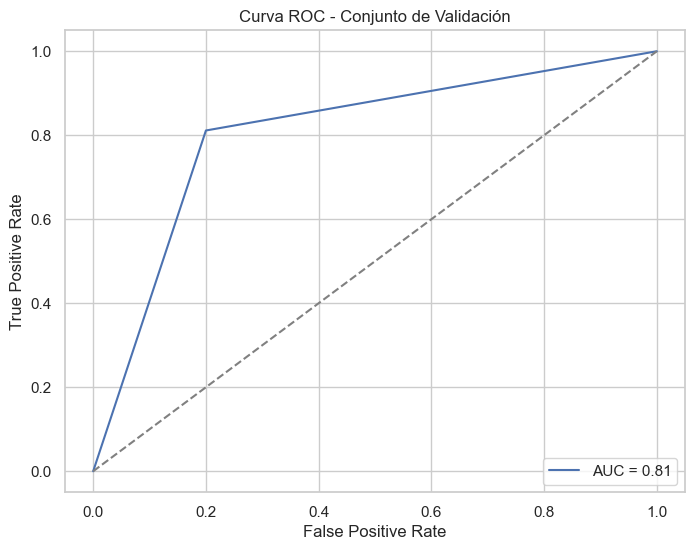

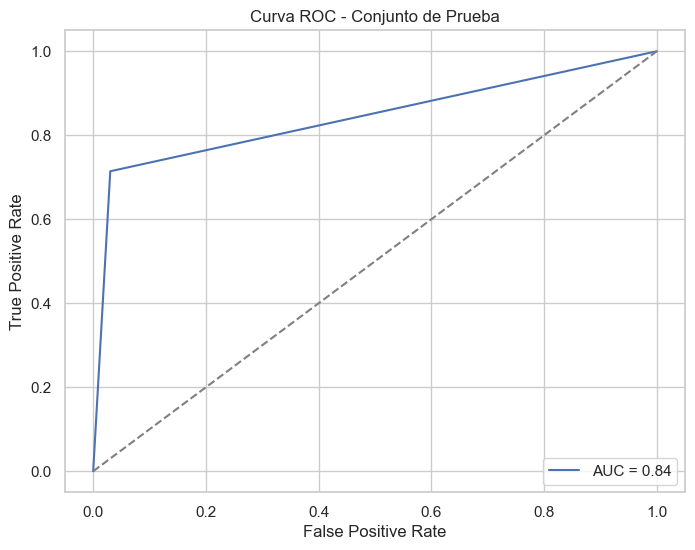

In [276]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Definir una función para visualizar la curva ROC
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Calcular y visualizar la curva ROC para el conjunto de entrenamiento
plot_roc_curve(y2_ent, yrf_ent_pred, title='Curva ROC - Conjunto de Entrenamiento')

# Calcular y visualizar la curva ROC para el conjunto de validación
plot_roc_curve(y2_val, yrf_val_pred, title='Curva ROC - Conjunto de Validación')

# Calcular y visualizar la curva ROC para el conjunto de prueba
plot_roc_curve(y2_prue, yrf_test_pred, title='Curva ROC - Conjunto de Prueba')

Algoritmo 2 - Redes neuronales

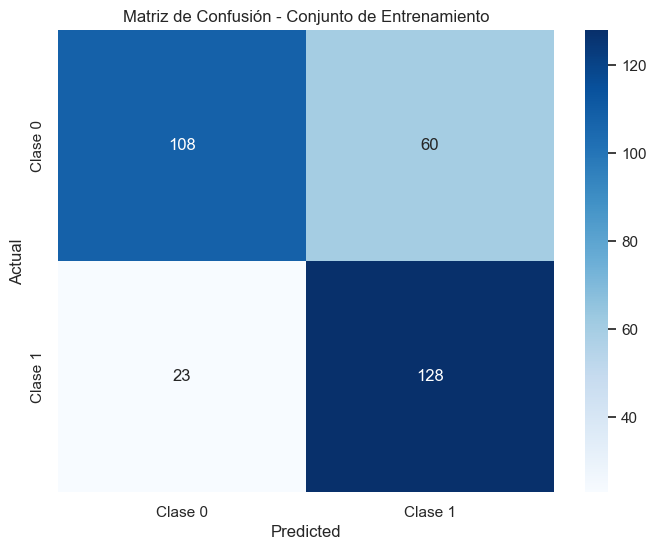

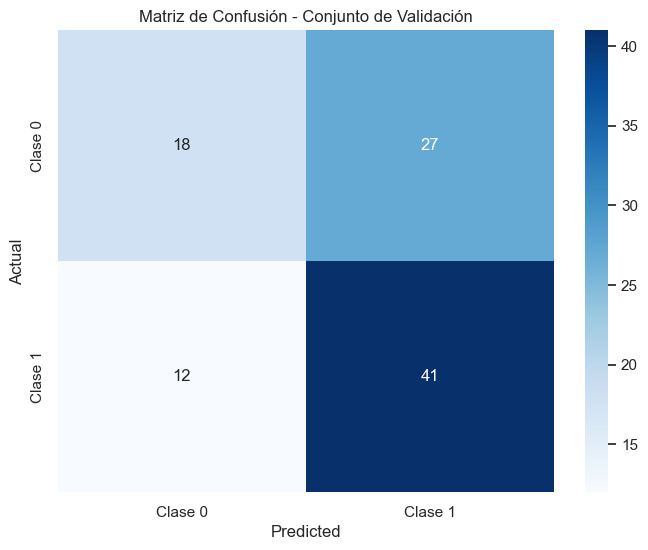

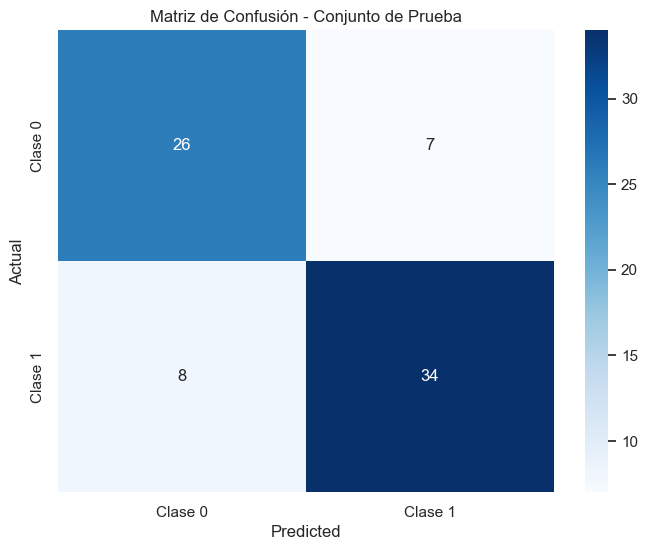

In [295]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Clase 0', 'Clase 1'], 
                yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Obtener las clases predichas (convertir a clases binarias si es necesario)
y_pred_train = (predictions_train > 0.5).astype(int)  # Ejemplo de umbral de clasificación
y_pred_val = (predictions_val > 0.5).astype(int)
y_pred_test = (predictions_test > 0.5).astype(int)

# Matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(y2_ent, y_pred_train, title='Matriz de Confusión - Conjunto de Entrenamiento')

# Matriz de confusión para el conjunto de validación
plot_confusion_matrix(y2_val, y_pred_val, title='Matriz de Confusión - Conjunto de Validación')

# Matriz de confusión para el conjunto de prueba
plot_confusion_matrix(y2_prue, y_pred_test, title='Matriz de Confusión - Conjunto de Prueba')

In [296]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_performance(y_true, y_pred, y_scores):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_scores)

    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcular la especificidad
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

    # Imprimir todas las métricas
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Specificity: {specificity:.4f}')

# Calcular las métricas de desempeño para el conjunto de entrenamiento
print('Métricas para el conjunto de entrenamiento:')
evaluate_performance(y2_ent, y_pred_train, predictions_train)

# Calcular las métricas de desempeño para el conjunto de validación
print('Métricas para el conjunto de validación:')
evaluate_performance(y2_val, y_pred_val, predictions_val)

# Calcular las métricas de desempeño para el conjunto de prueba
print('Métricas para el conjunto de Prueba:')
evaluate_performance(y2_prue, y_pred_test, predictions_test)


Métricas para el conjunto de entrenamiento:
Accuracy: 0.7398
Precision: 0.6809
Recall: 0.8477
F1-score: 0.7552
ROC AUC: 0.7819
Specificity: 0.6429
Métricas para el conjunto de validación:
Accuracy: 0.6020
Precision: 0.6029
Recall: 0.7736
F1-score: 0.6777
ROC AUC: 0.7124
Specificity: 0.4000
Métricas para el conjunto de Prueba:
Accuracy: 0.8000
Precision: 0.8293
Recall: 0.8095
F1-score: 0.8193
ROC AUC: 0.8420
Specificity: 0.7879


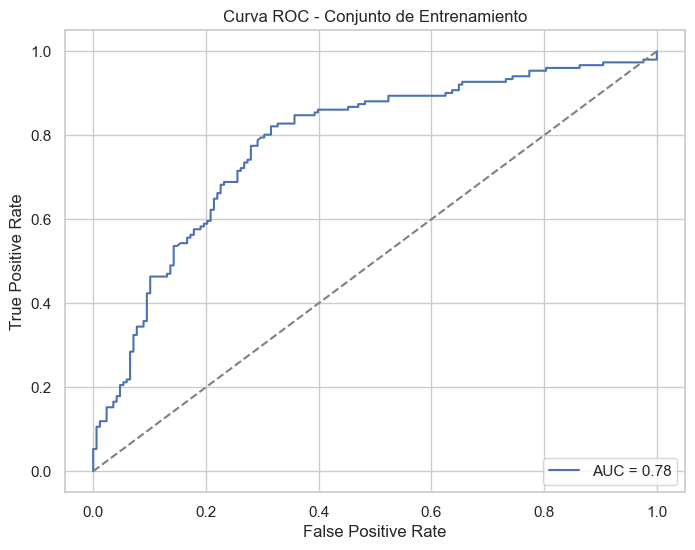

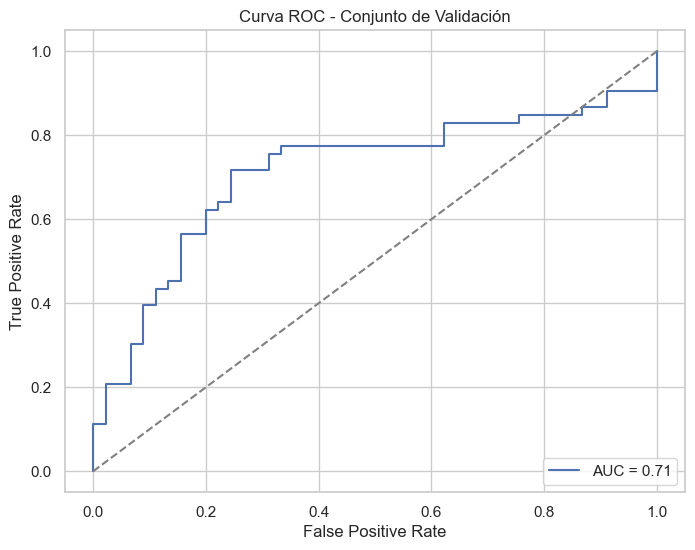

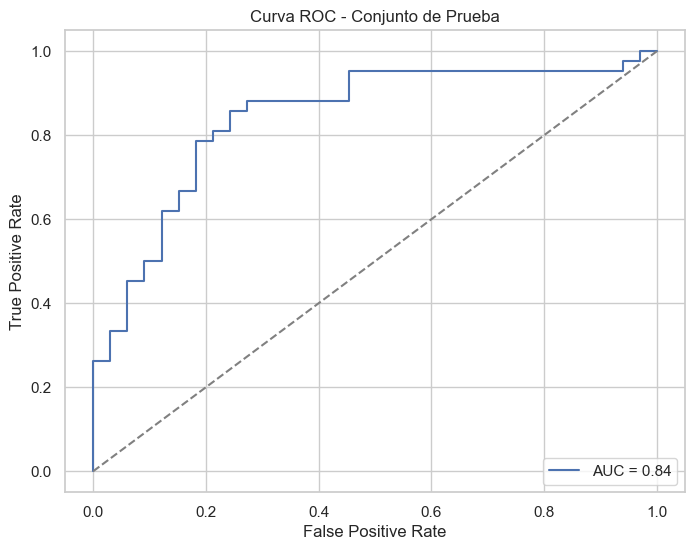

In [297]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Definir una función para visualizar la curva ROC
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Calcular y visualizar la curva ROC para el conjunto de entrenamiento
plot_roc_curve(y2_ent, predictions_train, title='Curva ROC - Conjunto de Entrenamiento')

# Calcular y visualizar la curva ROC para el conjunto de validación
plot_roc_curve(y2_val, predictions_val, title='Curva ROC - Conjunto de Validación')

# Calcular y visualizar la curva ROC para el conjunto de prueba
plot_roc_curve(y2_prue, predictions_test, title='Curva ROC - Conjunto de Prueba')

Algoritmo 3 - Regresion logistica con hiperparametros grid search

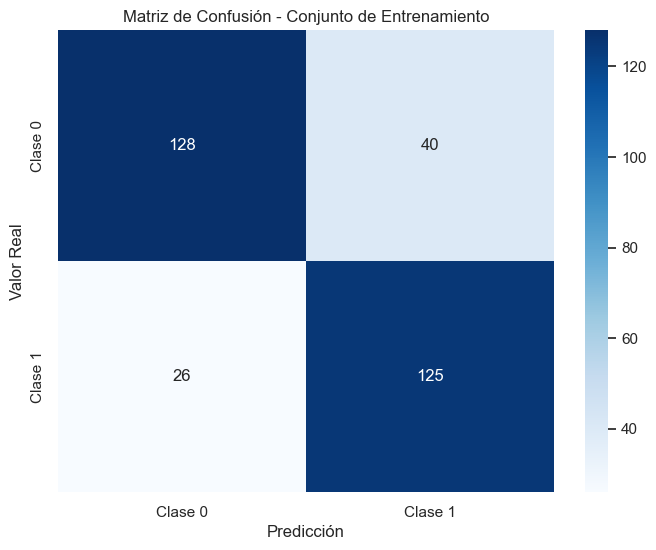

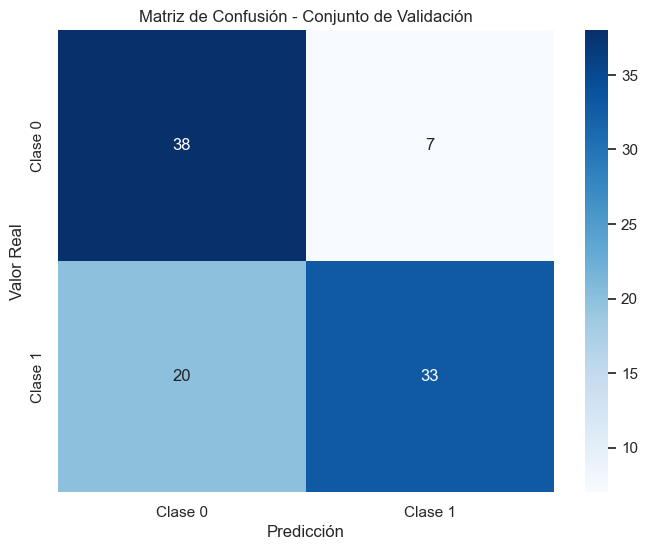

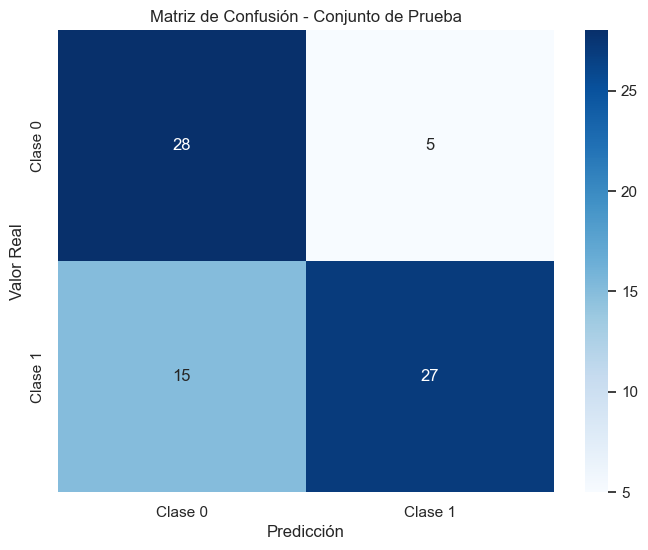

In [304]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los conjuntos de datos y etiquetas correspondientes
datasets = {
    'Entrenamiento': (x2_ent, y2_ent),
    'Validación': (x2_val, y2_val),
    'Prueba': (x2_prue, y2_prue)
}

# Crear un loop sobre los conjuntos de datos
for dataset_name, (X, y_true) in datasets.items():
    # Hacer predicciones con el mejor modelo
    y_pred = best_model.predict(X)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Mostrar la matriz de confusión como un mapa de calor
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Clase 0', 'Clase 1'],
                yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title(f'Matriz de Confusión - Conjunto de {dataset_name}')
    plt.show()

In [306]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = []

# Crear un loop sobre los conjuntos de datos
for dataset_name, (X, y_true) in datasets.items():
    # Hacer predicciones con el mejor modelo
    y_pred = best_model.predict(X)
    
    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Calcular especificidad
    specificity = tn / (tn + fp)
    
    # Mostrar métricas de evaluación
    print(f"--- Métricas de Evaluación para el Conjunto de {dataset_name} ---")
    print(f"Exactitud (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision): {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Puntaje F1 (F1 Score): {f1:.4f}")
    print(f"Especificidad (Specificity): {specificity:.4f}")
    print()
    
    # Almacenar los resultados para mostrar en un DataFrame u otro formato si es necesario
    results.append({
        'Conjunto de Datos': dataset_name,
        'Exactitud (Accuracy)': accuracy,
        'Precisión (Precision)': precision,
        'Recall': recall,
        'Puntaje F1 (F1 Score)': f1,
        'Especificidad (Specificity)': specificity
    })


--- Métricas de Evaluación para el Conjunto de Entrenamiento ---
Exactitud (Accuracy): 0.7931
Precisión (Precision): 0.7576
Recall: 0.8278
Puntaje F1 (F1 Score): 0.7911
Especificidad (Specificity): 0.7619

--- Métricas de Evaluación para el Conjunto de Validación ---
Exactitud (Accuracy): 0.7245
Precisión (Precision): 0.8250
Recall: 0.6226
Puntaje F1 (F1 Score): 0.7097
Especificidad (Specificity): 0.8444

--- Métricas de Evaluación para el Conjunto de Prueba ---
Exactitud (Accuracy): 0.7333
Precisión (Precision): 0.8438
Recall: 0.6429
Puntaje F1 (F1 Score): 0.7297
Especificidad (Specificity): 0.8485



In [307]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

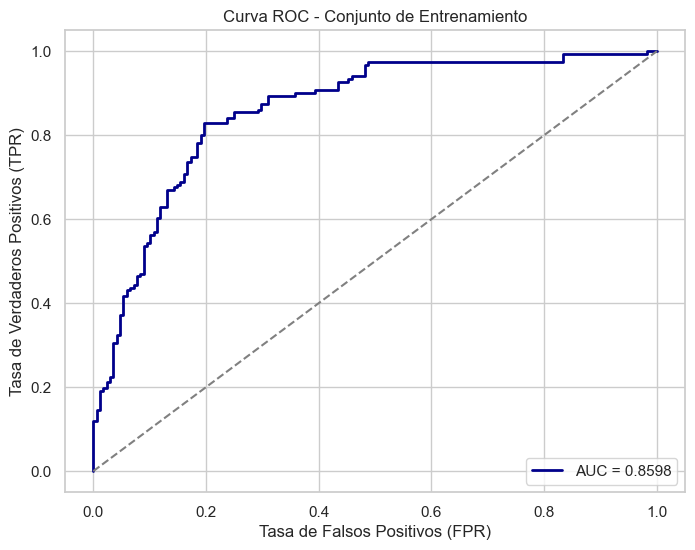

AUC para el Conjunto de Entrenamiento: 0.8598


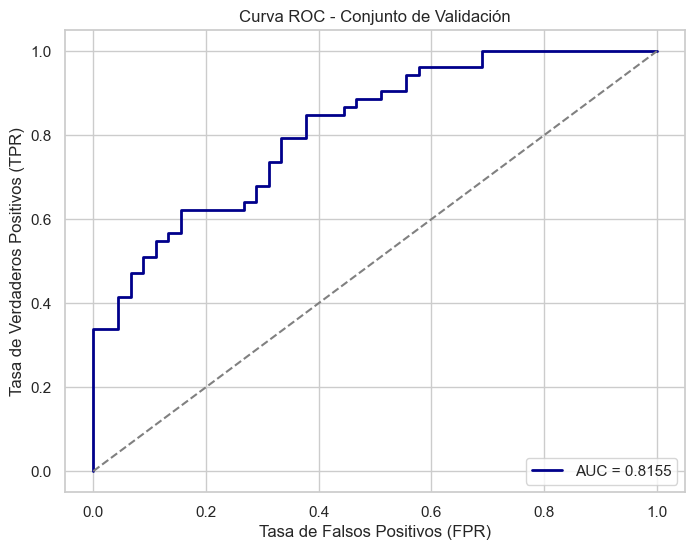

AUC para el Conjunto de Validación: 0.8155


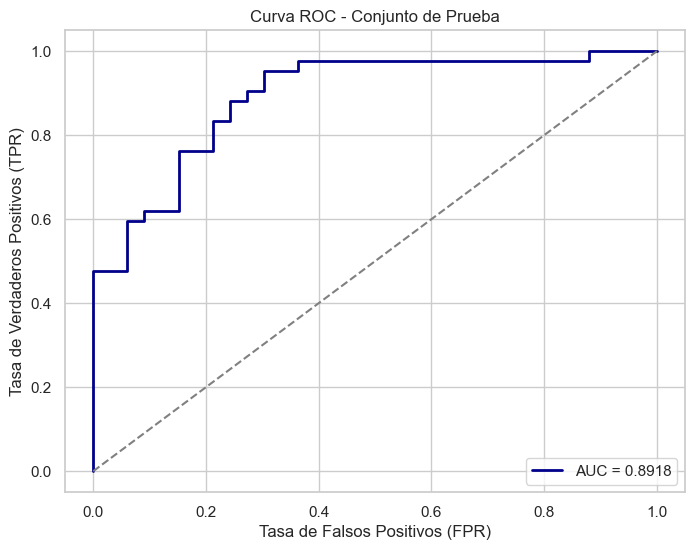

AUC para el Conjunto de Prueba: 0.8918


In [308]:
# Crear un loop sobre los conjuntos de datos
for dataset_name, (X, y_true) in datasets.items():
    # Obtener las probabilidades de predicción de clase 1 (positivo)
    y_prob = best_model.predict_proba(X)[:, 1]
    
    # Calcular la curva ROC y el AUC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)
    
    # Visualizar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC - Conjunto de {dataset_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Mostrar el valor del AUC
    print(f"AUC para el Conjunto de {dataset_name}: {roc_auc:.4f}")

Algoritmo 4 - Decision tree classifier, randomized search

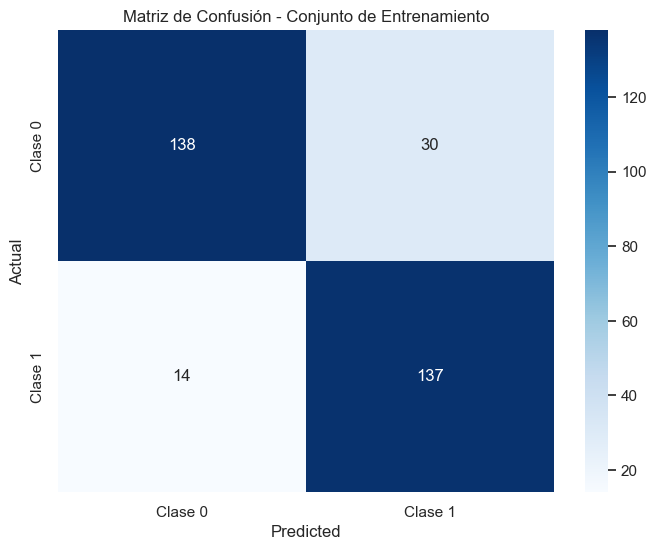

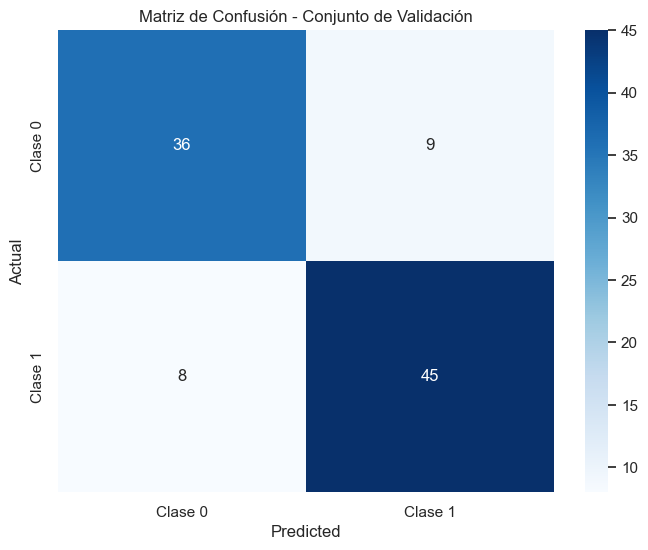

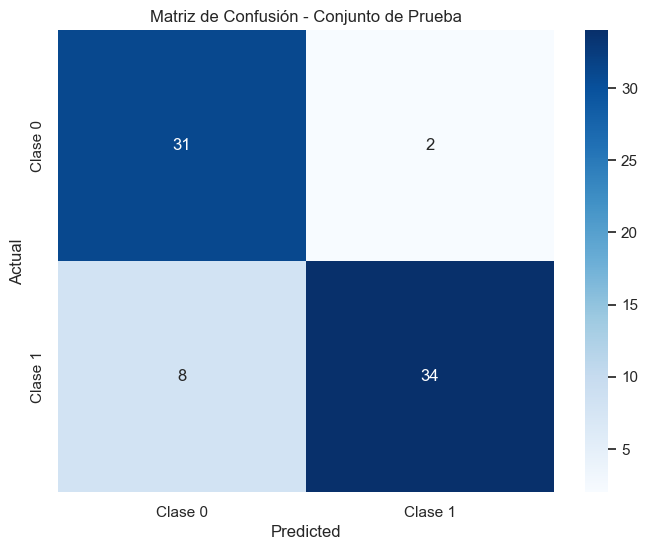

In [309]:
# Definir una función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Clase 0', 'Clase 1'], 
                yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Obtener las clases predichas (convertir a clases binarias si es necesario)
y_pred_train = (y2_ent_pred > 0.5).astype(int)  # Ejemplo de umbral de clasificación
y_pred_val = (y2_val_pred> 0.5).astype(int)
y_pred_test = (y2_prue_pred > 0.5).astype(int)

# Matriz de confusión para el conjunto de entrenamiento
plot_confusion_matrix(y2_ent, y_pred_train, title='Matriz de Confusión - Conjunto de Entrenamiento')

# Matriz de confusión para el conjunto de validación
plot_confusion_matrix(y2_val, y_pred_val, title='Matriz de Confusión - Conjunto de Validación')

# Matriz de confusión para el conjunto de prueba
plot_confusion_matrix(y2_prue, y_pred_test, title='Matriz de Confusión - Conjunto de Prueba')


In [310]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define la función para calcular la especificidad
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Define los conjuntos de datos y predicciones en una lista de tuplas
datasets = [
    ("Entrenamiento", x2_ent, y2_ent, y2_ent_pred),
    ("Validación", x2_val, y2_val, y2_val_pred),
    ("Prueba", x2_prue, y2_prue, y2_prue_pred)
]

# Define las métricas que quieres calcular, incluyendo la especificidad
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "Specificity": specificity_score  # Añade la especificidad a las métricas
}

# Itera sobre los conjuntos de datos y calcula las métricas
for dataset_name, X, y_true, y_pred in datasets:
    print(f"\nMétricas de Evaluación para el Conjunto de {dataset_name}:")
    
    # Calcula y muestra cada métrica
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_true, y_pred)
        print(f"{metric_name}: {metric_value}")



Métricas de Evaluación para el Conjunto de Entrenamiento:
Accuracy: 0.8620689655172413
Precision: 0.8203592814371258
Recall: 0.9072847682119205
F1 Score: 0.8616352201257861
Specificity: 0.8214285714285714

Métricas de Evaluación para el Conjunto de Validación:
Accuracy: 0.826530612244898
Precision: 0.8333333333333334
Recall: 0.8490566037735849
F1 Score: 0.8411214953271028
Specificity: 0.8

Métricas de Evaluación para el Conjunto de Prueba:
Accuracy: 0.8666666666666667
Precision: 0.9444444444444444
Recall: 0.8095238095238095
F1 Score: 0.8717948717948718
Specificity: 0.9393939393939394


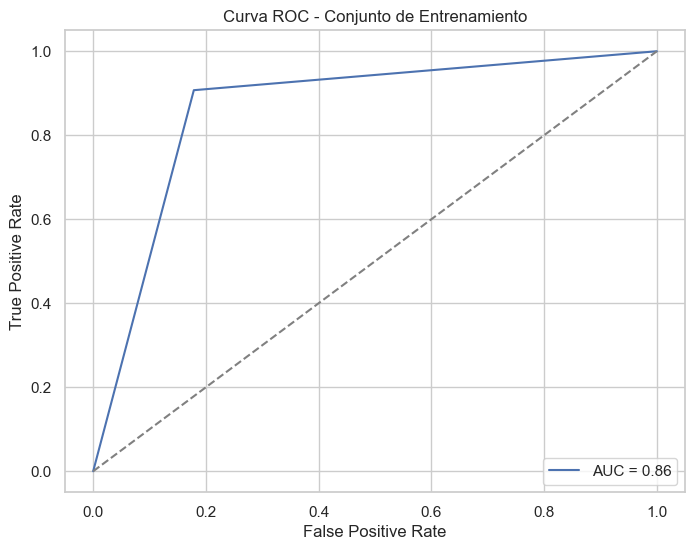

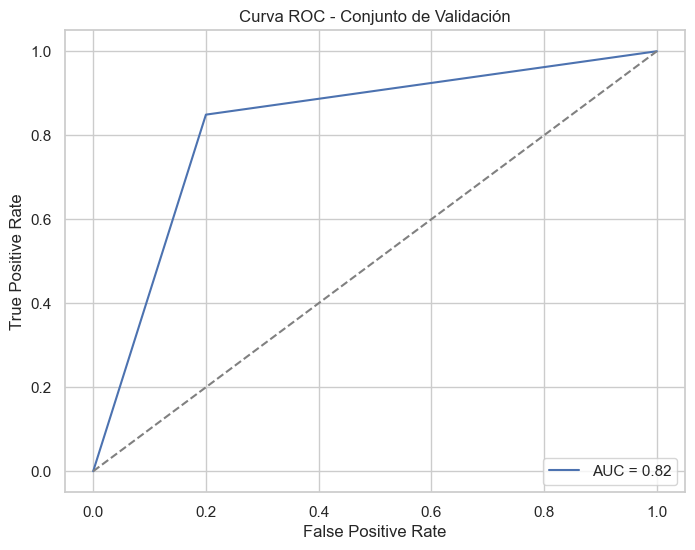

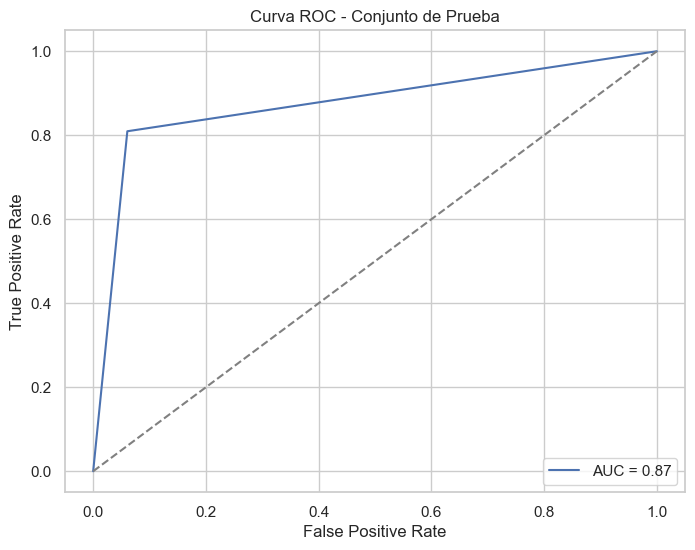

In [311]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Definir una función para visualizar la curva ROC
def plot_roc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Calcular y visualizar la curva ROC para el conjunto de entrenamiento
plot_roc_curve(y2_ent, y2_ent_pred, title='Curva ROC - Conjunto de Entrenamiento')

# Calcular y visualizar la curva ROC para el conjunto de validación
plot_roc_curve(y2_val, y2_val_pred, title='Curva ROC - Conjunto de Validación')

# Calcular y visualizar la curva ROC para el conjunto de prueba
plot_roc_curve(y2_prue, y2_prue_pred, title='Curva ROC - Conjunto de Prueba')

### 6.2 Considerando los costos de los tipos de errores en este problema, seleccione y justifique la métrica de evaluación más adecuada. 

Es crucial definir la métrica de trabajo considerando el contexto del problema y la base de datos para evaluar qué modelo prevalece sobre otro. Dada la naturaleza de la enfermedad en cuestión, como un ataque cerebral, se vuelve crucial determinar qué errores deseamos minimizar o maximizar en nuestras predicciones. En este caso, se enfoca en la precisión y la sensibilidad del modelo, buscando reducir los falsos positivos para evitar diagnosticar erróneamente un ataque cerebral, lo cual puede tener consecuencias psicológicas significativas para la persona afectada. Además, es esencial maximizar la sensibilidad para evitar falsos negativos y asegurar que no se pase por alto un posible ataque cerebral. Considerando estos factores, la métrica adecuada sería el F1-score, que proporciona un equilibrio entre precisión y sensibilidad, según Zhand et al. (2015).

### 6.3 Seleccione y justifique el mejor algoritmo en base a la métrica de evaluación escogida y su desempeño en el set de entrenamiento, validación y prueba. Analice si el modelo está sobreajustado, balanceado, o ajustando pobremente. 

Cómo se puede apreciar, los que tienen un F score más alto en el set de prueba es el de Redes Neuronales y el de Decision Tree Classifier, pero por el porcentaje que es de 87% se ha decidido escoger el modelo de Decision Tree Classifier. Se puede observar, que F1-score en el modelo de validación, de 84% es ligeramente menor que el de entrenamiento con 86%, por lo que en cierta medida sufre de sobreajuste, pero esto no se puede observar en el set de prueba, ya que el porcentaje es mayor que en el de entrenamiento y validación.  Por lo tanto, es capaz de reconocer tan solo los aspectos más importantes, así es esperado que en el futuro, este sea capaz de adaptarse a todo tipo de situaciones, que en aspectos de la vida real va a ser fundamental, ya que puede ser capaz de predecir cosas, tan solo tomando los aspectos más importantes del set de entrenamiento. Entonces, podemos -concluir que el mejor algoritmo para esta situación es la de Decision Tree Classifier, que arrojó un F-score en el entrenamiento de 0,8616, en el set de validación de 0,8411 y en el de prueba de 0,8718.

### 6.4 Investigue como se puede utilizar un random forest para seleccionar las variables predictivas más importantes para la predicción. Utilizando este método, determine cuales son las variables predictivas más importantes para predecir un ataque cerebral. Compare los resultados con el análisis de correlación realizado al inicio. En la presentación y reporte explique el método utilizado.

In [313]:
# Se importa las bibliotecas necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Se crea el random forest y ajusta los datos de entrenamiento (rf_var-->random forest para las variables)
rf_var = RandomForestRegressor(n_estimators=100, random_state=42)
rf_var.fit(x2_ent, y2_ent)

# Se evalúa el rendimiento del modelo en los datos de prueba
y_pred = rf_var.predict(x2_prue)
r2_score(y2_prue, y2_prue_pred)

# Se obtiene la importancia de las variables predictoras
importances = pd.DataFrame({'Feature': x2_ent.columns, 'Importance': rf_var.feature_importances_})
importances = importances.sort_values('Importance', ascending=False).set_index('Feature')
importances.head(20)


,Importance
Feature,
Age,0.461255
Income,0.231148
Avg_glucose_level,0.092966
Bmi,0.085842
Children_1,0.018873
Heart_Disease_1,0.014399
Residence_Urban,0.013373
Smoking_never smoked,0.010421
Grupo de Imc_Obesidad Grado 1,0.009142
